<a href="https://colab.research.google.com/github/Vishesh-Alag/Product_Segmentation_and_Recommendation_System_Using_Clustering_Content_Based_Filtering/blob/main/Product_Segmentation_Clustering_and_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions to Run the Project:

- Make a copy of this Google Colab file - so that you can run the project.
- After that just Upload one dataset file : named -  **'new_retail_data.csv'**
link - https://drive.google.com/file/d/1vZ2jkQcApDsaldNrJfwewDHkwD0v5KGX/view?usp=drive_link

- Wait until it is uploaded fully, this is important because it has huge amount of data approx 3 lakh rows. so that's why to wait.

After that click on 'Run all' option.

all the dataset files which will be use further will be saved locally and automatically.

# Product Segmentation and Recommendation System Using Machine Learning

## Project Description

### Project Summary

This project develops a comprehensive data-driven solution for e-commerce product analysis by implementing advanced machine learning techniques for product segmentation and personalized recommendations. The system processes retail transaction data containing 293,908 records across 30 features, applying clustering algorithms to identify distinct product segments and building a content-based recommendation engine to enhance customer experience and business decision-making.

### Problem Statement

E-commerce businesses face significant challenges in:

- **Product Portfolio Management**: Difficulty in understanding which products perform well across different customer segments
- **Inventory Optimization**: Lack of insights into product performance patterns for strategic stocking decisions
- **Customer Experience**: Inability to provide personalized product recommendations based on customer preferences and product similarities
- **Market Segmentation**: Challenge in identifying meaningful product clusters that can drive targeted marketing strategies
- **Business Intelligence**: Need for data-driven insights to optimize product positioning, pricing, and promotional strategies

### Project Objectives

#### Primary Objectives
1. **Product Segmentation**: Implement unsupervised machine learning to identify distinct product clusters based on purchasing patterns, ratings, and product characteristics
2. **Recommendation System**: Develop a content-based filtering system using cosine similarity to provide personalized product recommendations
3. **Business Intelligence**: Generate actionable insights for product portfolio optimization and customer targeting strategies

#### Secondary Objectives
1. **Data Quality Enhancement**: Implement comprehensive data preprocessing pipelines to handle missing values, outliers, and data type optimization
2. **Interactive Prediction**: Create user-friendly interfaces for real-time product cluster prediction and recommendation generation
3. **Statistical Validation**: Apply statistical tests to validate relationships between product categories, customer segments, and purchasing behaviors

### Approaches Used

#### 1. Data Preprocessing and Engineering
- **Data Cleaning**: Removed duplicates, handled missing values (< 1% threshold), and optimized data types
- **Feature Selection**: Focused on product-centric features for clustering and recommendations
- **Feature Engineering**: Converted categorical feedback to numerical scores (Bad=1, Average=2, Good=3, Excellent=4)
- **Outlier Treatment**: Applied IQR method for outlier detection and removal in Total_Amount
- **Data Transformation**: Implemented One-Hot Encoding for product categorical variables and StandardScaler for product numerical features

#### 2. Exploratory Data Analysis (EDA)
- **Univariate Analysis**: Distribution analysis of all variables using histograms and count plots
- **Bivariate Analysis**: Correlation analysis between product categories, customer segments, and purchasing patterns
- **Multivariate Analysis**: Advanced visualizations including heatmaps, pairplots, and temporal trend analysis
- **Statistical Testing**: Applied Chi-square tests, Kruskal-Wallis H-test, and Mann-Whitney U tests for relationship validation

#### 3. Machine Learning Implementation

##### Unsupervised Learning - Product Clustering
- **Feature Focus**: Used product-specific features for clustering:
  - **Categorical**: Product_Category, Product_Brand, Product_Type
  - **Numerical**: Total_Amount, Ratings, Feedback_Score
- **Algorithm**: MiniBatchKMeans clustering for scalability with large datasets
- **Optimization**: Elbow method and Silhouette analysis for optimal cluster determination (k=4)
- **Cluster Validation**: Achieved meaningful business-interpretable segments:
  - **Cluster 0**: Customer Favorites (Books & Electronics) - High ratings, balanced categories
  - **Cluster 1**: High Revenue Essentials & Electronics - Premium products, highest revenue
  - **Cluster 2**: Mass Grocery Products - Moderate ratings, high volume items
  - **Cluster 3**: Low-Performing Generic Products - Lowest quality metrics

##### Dimensionality Reduction
- **PCA Visualization**: Reduced high-dimensional feature space to 2D for cluster visualization
- **Variance Explanation**: Captured 51.8% of total variance in first two principal components

#### 4. Recommendation System Development
- **Content-Based Filtering**: Implemented cosine similarity on encoded product features only
- **Feature Utilization**: Used the same product features as clustering:
  - One-hot encoded categorical features (Product_Category, Product_Brand, Product_Type)
  - Standardized numerical features (Total_Amount, Ratings, Feedback_Score)
- **Advanced Filtering**: Multi-criteria filtering including cluster proximity, brand preferences, category filtering, and minimum rating thresholds
- **Similarity Computation**: Calculated product-to-product similarity based purely on product characteristics, not customer behavior

#### 5. Interactive System Development
- **Real-time Prediction**: Created user input interface for instant product cluster prediction
- **Flexible Recommendations**: Developed parameterized recommendation system with customizable filters
- **Model Persistence**: Implemented pickle-based model serialization for production deployment

### Technical Stack
- **Programming Language**: Python
- **Data Processing**: Pandas, NumPy
- **Machine Learning**: Scikit-learn (MiniBatchKMeans, PCA, StandardScaler, OneHotEncoder)
- **Statistical Analysis**: SciPy (statistical tests)
- **Visualization**: Matplotlib, Seaborn
- **Model Persistence**: Pickle

### Key Deliverables
1. **Clustered Product Database**: Segmented products with business-meaningful labels
2. **Preprocessing Pipeline**: Reusable data transformation workflows
3. **Trained ML Models**: Serialized clustering and recommendation models
4. **Interactive Prediction System**: User-friendly interfaces for real-time predictions
5. **Statistical Insights**: Validated relationships between business variables
6. **Visualization Dashboard**: Comprehensive EDA results and cluster visualizations

### Business Impact
The system enables data-driven decision making for product management, inventory optimization, personalized marketing campaigns, and enhanced customer experience through intelligent product recommendations.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("new_retail_data.csv")
print(df,"\n")
# Quick shape and info check
print("Initial shape:", df.shape)
df.info()

#  Step 2: Drop Duplicates
# Remove fully duplicated rows
df = df.drop_duplicates()
print("\nAfter removing duplicates:", df.shape)

#  Step 3: Check % of Missing Values
missing_percent = df.isnull().mean() * 100
missing_report = pd.DataFrame({'Missing %': missing_percent})
print("Missing Values (%):")
print(missing_report.sort_values(by='Missing %', ascending=False))



        Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362

In [ ]:
#  Step 4: Drop Rows with Missing Critical Data
# Drop rows with any NA values (since missing values are <1% and data size is large)
df_cleaned = df.dropna()
print("After dropping rows with missing values:", df_cleaned.shape)


After dropping rows with missing values: (293908, 30)


In [ ]:
#  Step 5: Check Data Types (for later preprocessing)
df_cleaned.dtypes


,0
Transaction_ID,float64
Customer_ID,float64
Name,object
Email,object
Phone,float64
Address,object
City,object
State,object
Zipcode,float64
Country,object


In [ ]:
#  Step 6: Reset Index (Optional, but good practice)
df_cleaned.reset_index(drop=True, inplace=True)


In [ ]:
print(df_cleaned.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

In [ ]:
cols_to_drop = [
    'Transaction_ID',
    'Customer_ID',
    'Name',
    'Email',
    'Phone',
    'Address',
    'Zipcode'
]

df_cleaned.drop(columns=cols_to_drop, inplace=True)

print(df_cleaned.columns)

Index(['City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


/tmp/ipython-input-6-3968486885.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=cols_to_drop, inplace=True)


In [ ]:


import pandas as pd
import calendar

# Work on a safe copy to avoid chained assignment warnings
df_cleaned = df_cleaned.copy()

# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Convert the 'Time' column to time format (HH:MM:SS)
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Map full month names (e.g., September) to their numeric values (e.g., 9)
month_map = {month: i for i, month in enumerate(calendar.month_name) if month}
df_cleaned['num_month'] = df_cleaned['Month'].map(month_map)

# Drop rows with invalid or missing month names
df_cleaned = df_cleaned.dropna(subset=['num_month'])

# Convert 'num_month' and 'Year' to integer types
df_cleaned['num_month'] = df_cleaned['num_month'].astype('int')
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce', downcast='integer')

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Display final data types for verification
print(df_cleaned.dtypes)



City                        object
State                       object
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                         int16
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings                    float64
products                    object
num_month                    int64
dtype: object


In [ ]:
df_cleaned.head()


,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,num_month
0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023,September,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,9
1,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023,December,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,12
2,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023,April,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,4
3,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2023-05-08,2023,May,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,5
4,Bristol,England,UK,22.0,Male,Low,Premium,2024-01-10,2024,January,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,1


In [ ]:
df_cleaned = df_cleaned.copy()
# Refined categorical columns (removed 'Income', 'Feedback', 'products')

cat_cols = [
    'City', 'State', 'Country', 'Gender', 'Customer_Segment',
    'Month', 'Product_Category', 'Product_Brand', 'Product_Type',
    'Shipping_Method', 'Payment_Method', 'Order_Status'
]

# Convert to category dtype
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Optimize numeric columns
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce', downcast='integer')
df_cleaned['Total_Purchases'] = pd.to_numeric(df_cleaned['Total_Purchases'], errors='coerce', downcast='integer')
df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce', downcast='float')
df_cleaned['Total_Amount'] = pd.to_numeric(df_cleaned['Total_Amount'], errors='coerce', downcast='float')
df_cleaned['Ratings'] = pd.to_numeric(df_cleaned['Ratings'], errors='coerce', downcast='float')
df_cleaned['num_month'] = pd.to_numeric(df_cleaned['num_month'], downcast='integer')

# Optional: verify the final dtypes
print(df_cleaned.dtypes)


City                      category
State                     category
Country                   category
Age                           int8
Gender                    category
Income                      object
Customer_Segment          category
Date                datetime64[ns]
Year                         int16
Month                     category
Time                        object
Total_Purchases               int8
Amount                     float32
Total_Amount               float32
Product_Category          category
Product_Brand             category
Product_Type              category
Feedback                    object
Shipping_Method           category
Payment_Method            category
Order_Status              category
Ratings                    float32
products                    object
num_month                     int8
dtype: object


In [ ]:
print(df_cleaned)

              City            State    Country  Age  Gender  Income  \
0         Dortmund           Berlin    Germany   21    Male     Low   
1       Nottingham          England         UK   19  Female     Low   
2          Geelong  New South Wales  Australia   48    Male     Low   
3         Edmonton          Ontario     Canada   56    Male    High   
4          Bristol          England         UK   22    Male     Low   
...            ...              ...        ...  ...     ...     ...   
293903  Townsville  New South Wales  Australia   31    Male  Medium   
293904     Hanover           Berlin    Germany   35  Female     Low   
293905    Brighton          England         UK   41    Male     Low   
293906     Halifax          Ontario     Canada   41    Male  Medium   
293907      Tucson    West Virginia        USA   28  Female     Low   

       Customer_Segment       Date  Year      Month  ... Product_Category  \
0               Regular 2023-09-18  2023  September  ...         Cloth

In [ ]:
# Optional: Ordinal encoding
df_cleaned['Income'] = pd.Categorical(df_cleaned['Income'], categories=['Low', 'Medium', 'High'], ordered=True)
df_cleaned['Feedback'] = pd.Categorical(df_cleaned['Feedback'], categories=['Bad', 'Average', 'Good', 'Excellent'], ordered=True)


In [ ]:
print(df_cleaned.dtypes)


City                      category
State                     category
Country                   category
Age                           int8
Gender                    category
Income                    category
Customer_Segment          category
Date                datetime64[ns]
Year                         int16
Month                     category
Time                        object
Total_Purchases               int8
Amount                     float32
Total_Amount               float32
Product_Category          category
Product_Brand             category
Product_Type              category
Feedback                  category
Shipping_Method           category
Payment_Method            category
Order_Status              category
Ratings                    float32
products                    object
num_month                     int8
dtype: object


In [ ]:
df_cleaned.to_csv('cleaned_product_data.csv', index=False)


##**EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("cleaned_product_data.csv")
# Convert relevant columns to 'category' again
categ_cols = [
    'Gender', 'Customer_Segment', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Feedback',
    'Shipping_Method', 'Payment_Method', 'Order_Status','Month','Income'
]

for col in categ_cols:
    df[col] = df[col].astype('category')



print(df.shape)

(293908, 24)


DATASET OVERVIEW

In [ ]:
df.head()

,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,num_month
0,Dortmund,Berlin,Germany,21,Male,Low,Regular,2023-09-18,2023,September,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,9
1,Nottingham,England,UK,19,Female,Low,Premium,2023-12-31,2023,December,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,12
2,Geelong,New South Wales,Australia,48,Male,Low,Regular,2023-04-26,2023,April,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,4
3,Edmonton,Ontario,Canada,56,Male,High,Premium,2023-05-08,2023,May,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,5
4,Bristol,England,UK,22,Male,Low,Premium,2024-01-10,2024,January,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,1


Data Types Summary

In [ ]:
df.dtypes


,0
City,object
State,object
Country,object
Age,int64
Gender,category
Income,category
Customer_Segment,category
Date,object
Year,int64
Month,category


VERIFYING Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)
df.isnull().mean().sort_values(ascending=False) * 100  # percentage


,0
City,0.0
State,0.0
Country,0.0
Age,0.0
Gender,0.0
Income,0.0
Customer_Segment,0.0
Date,0.0
Year,0.0
Month,0.0


**Distribution Analysis**

#### Summary Statistics for Numerical Columns

In [ ]:
df.describe()

,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings,num_month
count,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000,293908.000000
mean,35.465530,2023.165127,5.359837,255.153875,1367.684181,3.162320,6.021976
std,15.017638,0.371295,2.868441,141.389109,1128.898841,1.320755,3.342448
min,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000,1.000000
25%,22.000000,2023.000000,3.000000,132.837598,438.844040,2.000000,4.000000
50%,32.000000,2023.000000,5.000000,255.464525,1041.164250,3.000000,6.000000
75%,46.000000,2023.000000,8.000000,377.639390,2028.951750,4.000000,8.000000
max,70.000000,2024.000000,10.000000,499.997920,4999.626000,5.000000,12.000000


#### Histogram for Continuous Variables

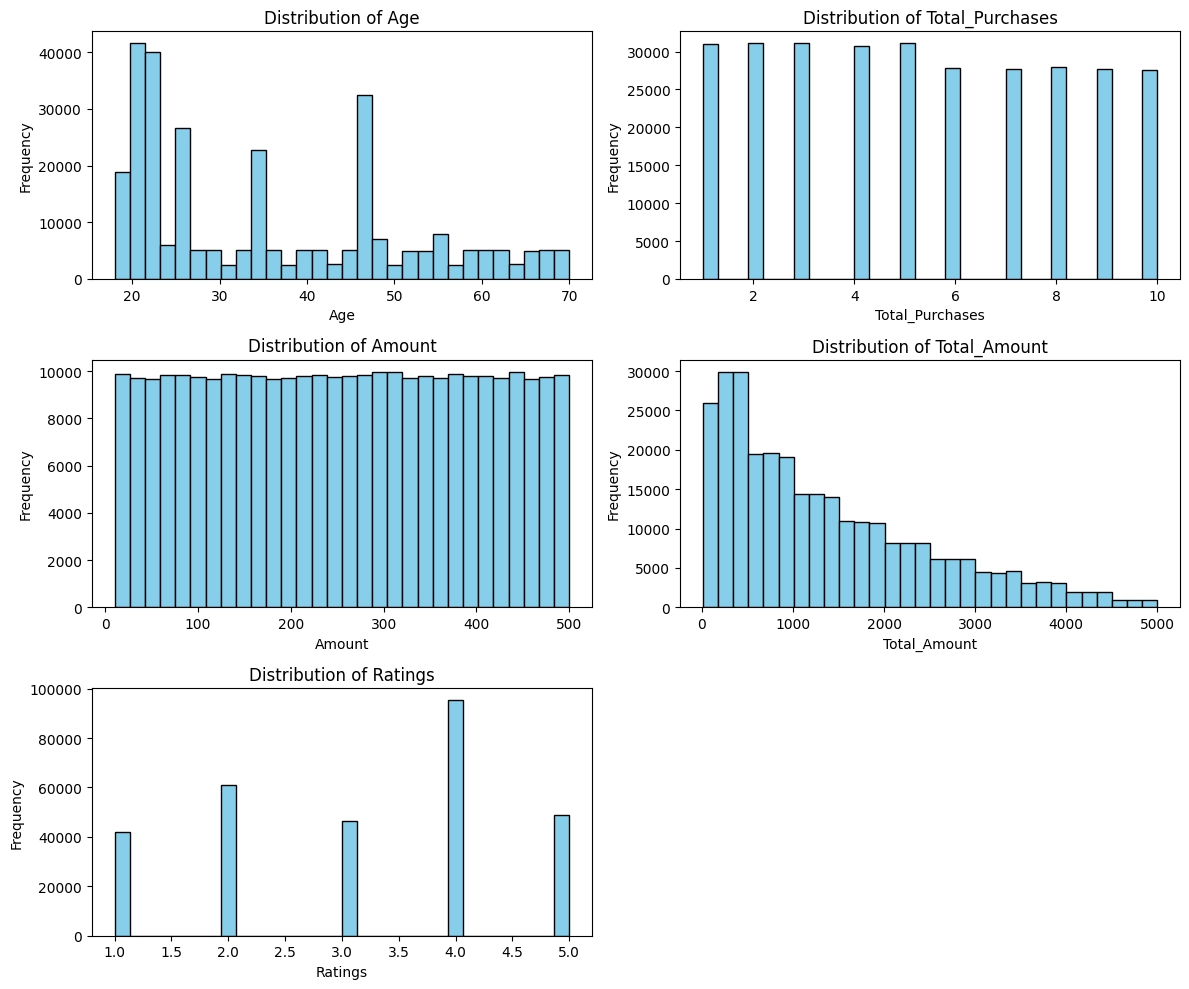

In [ ]:
#  List of numerical columns to visualize
num_cols = [
    'Age',
    'Total_Purchases',
    'Amount',
    'Total_Amount',
    'Ratings'
]

# Note: 'Income' is categorical (Low/Medium/High), not numeric — removing from num_cols

# Plotting histograms for each numerical column
plt.figure(figsize=(12, 10))  # Set the overall figure size

# Loop through and plot each histogram
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)  # Create a grid of 3 rows x 2 columns
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Key Insights from Distribution Analysis
1. Age Distribution
Pattern: Bimodal distribution with peaks around ages 22-24 and 45-47

Primary Peak: Young adults (22-24) - highest frequency ~42,000
Secondary Peak: Middle-aged customers (45-47) - frequency ~33,000
Valley: Ages 30-40 show lower engagement

Business Insights:

Target Demographics: Two distinct customer segments - young professionals and established middle-aged consumers
Marketing Strategy: Need age-specific campaigns for these two groups
Product Positioning: Young adults may prefer trendy/tech products; middle-aged prefer quality/utility

2. Total_Purchases Distribution
Pattern: Nearly uniform distribution across 1-10 purchases

Range: 1-10 purchases per customer with consistent frequency (~28,000-32,000)
Shape: Remarkably flat distribution

Business Insights:

Customer Loyalty: No clear distinction between one-time vs repeat buyers
Engagement Opportunity: Equal potential to convert any customer into higher purchase volumes
Inventory Planning: Consistent demand patterns across purchase frequencies

3. Amount Distribution
Pattern: Uniform distribution across $0-500 range

Shape: Perfectly flat distribution suggests diverse price preferences
Range: Even spread from low to high-value purchases

Business Insights:

Pricing Strategy: Customers are equally likely to buy across all price points
Product Portfolio: Need diverse price ranges to capture all segments
Revenue Optimization: No single price point dominates - flexible pricing possible

4. Total_Amount Distribution
Pattern: Right-skewed (exponential decay) - most customers spend less

Peak: Highest frequency at lower spending ranges (0-500)
Tail: Few high-value customers spending 3000-5000+
Shape: Classic retail spending pattern

Business Insights:

Customer Base: Majority are moderate spenders with small percentage of high-value customers
Revenue Strategy: Focus on retaining high-spending customers while engaging mass market
Market Positioning: Clear distinction between budget-conscious and premium customer segments

5. Ratings Distribution
Pattern: Heavily concentrated at rating 4.0

Dominant Rating: 4.0 (frequency ~95,000) - overwhelmingly positive
Secondary Ratings: 2.0 and 5.0 show moderate frequencies
Low Ratings: 1.0 and 3.0 are least common

Business Insights:

Customer Satisfaction: Generally positive customer experience with most products rated 4.0
Quality Control: Products consistently meet customer expectations
Performance Standard: Strong baseline satisfaction but few products achieve perfect 5.0 Ratings

####Box Plots for Outlier Detection

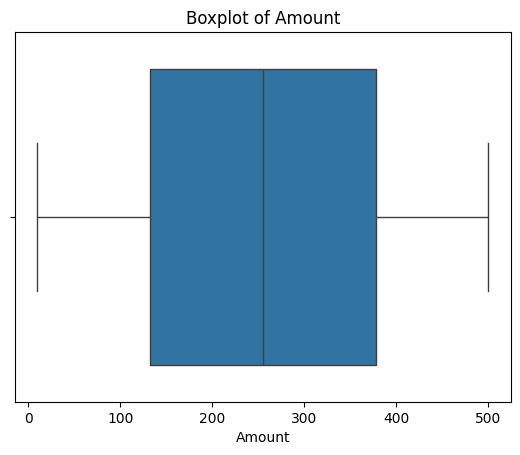

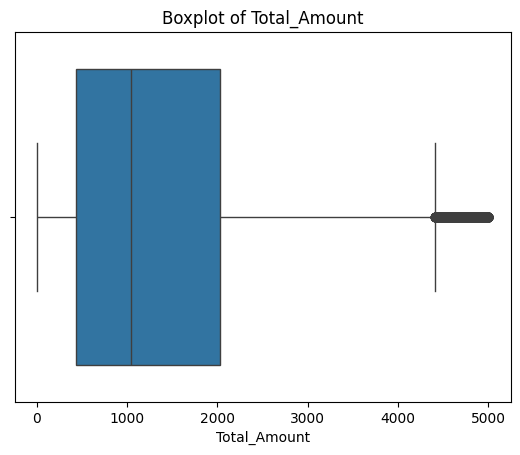

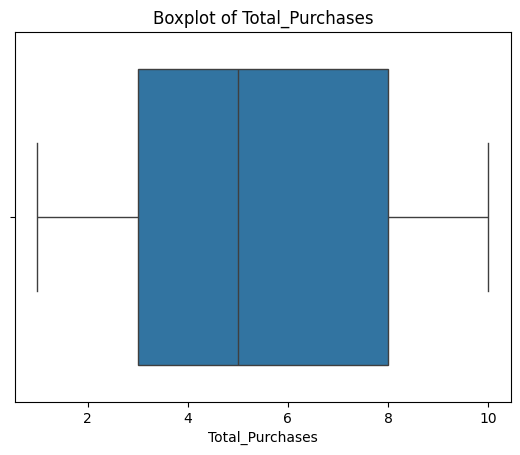

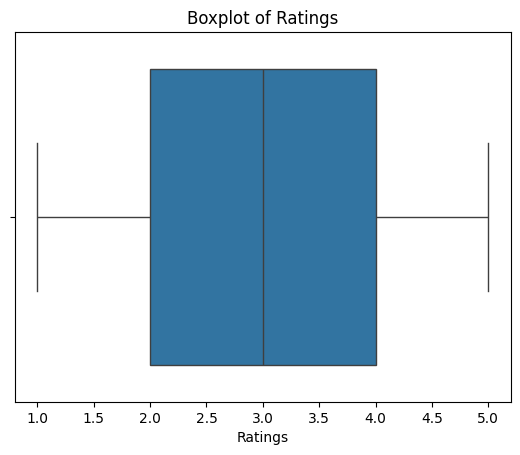

In [ ]:
for col in ['Amount', 'Total_Amount', 'Total_Purchases', 'Ratings']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Boxplot Analysis - Outlier Detection Insights
1. Amount Boxplot

Pattern: Clean distribution with no outliers

Range: $150-400 approximately

Median: Around $250-275
Quartiles: Well-balanced distribution
Outliers: None detected

Business Insights:

Pricing Consistency: Individual product prices are well-controlled within
reasonable range

Market Positioning: Products priced in mid-range segment ($150-400)

Quality Control: No extreme pricing anomalies or data entry errors
Customer Accessibility: Price points are accessible to broad customer base

2. Total_Amount Boxplot

Pattern: Significant outliers present on the high end

Main Distribution: $0-2000 range (box and whiskers)

Median: Around $1000

Outliers: Multiple high-value transactions above $4000-5000
Shape: Right-skewed with long tail

Business Insights:

VIP Customers: Clear presence of high-spending customers (outliers represent premium buyers)
Revenue Concentration: Small percentage of customers contribute disproportionately to revenue
Market Segmentation: Distinct separation between regular and premium customer spending
Business Opportunity: Outliers represent target segment for premium services/products

3. Total_Purchases Boxplot
Pattern: Symmetric distribution with no outliers

Range: 3-9 purchases per customer
Median: Around 5-6 purchases
Distribution: Evenly spread quartiles
Outliers: None detected

Business Insights:

Customer Behavior: Consistent purchasing patterns across customer base
Engagement Level: Moderate repeat purchase behavior (3-9 transactions)
Loyalty Opportunity: No extreme frequent buyers, suggesting room for loyalty programs
Predictable Demand: Stable purchasing frequency aids inventory planning

4. Ratings Boxplot
Pattern: Symmetric distribution with no outliers

Range: 2.0-5.0 rating scale
Median: Around 3.5-4.0
Distribution: Balanced across rating spectrum
Outliers: None detected

Business Insights:

Quality Consistency: No extremely poor or suspiciously perfect ratings
Customer Satisfaction: Ratings centered around good-to-very good range
Authentic Feedback: Natural distribution suggests genuine customer reviews
Performance Standard: Consistent product quality across portfolio

Key Takeaways:
Data Quality:

Clean data with minimal outliers in most variables
Total_Amount outliers are legitimate business cases (high-value customers)

Business Patterns:

Stable Operations: Most metrics show normal, controlled distributions
Premium Segment: High-value customers clearly identifiable through spending outliers
Consistent Experience: Ratings and purchase frequency show predictable patterns

Strategic Implications:

Focus on Outliers: High-spending customers (Total_Amount outliers) deserve special attention
Standardized Operations: Consistent pricing and rating patterns indicate good operational control
Growth Opportunity: Uniform purchase frequency suggests potential for increasing customer engagement

The boxplots validate that your data is clean and business patterns are logical, with Total_Amount outliers representing valuable high-spending customers rather than data quality issues.

#### Univariate Analysis

Categorical Distribution (Value Counts)

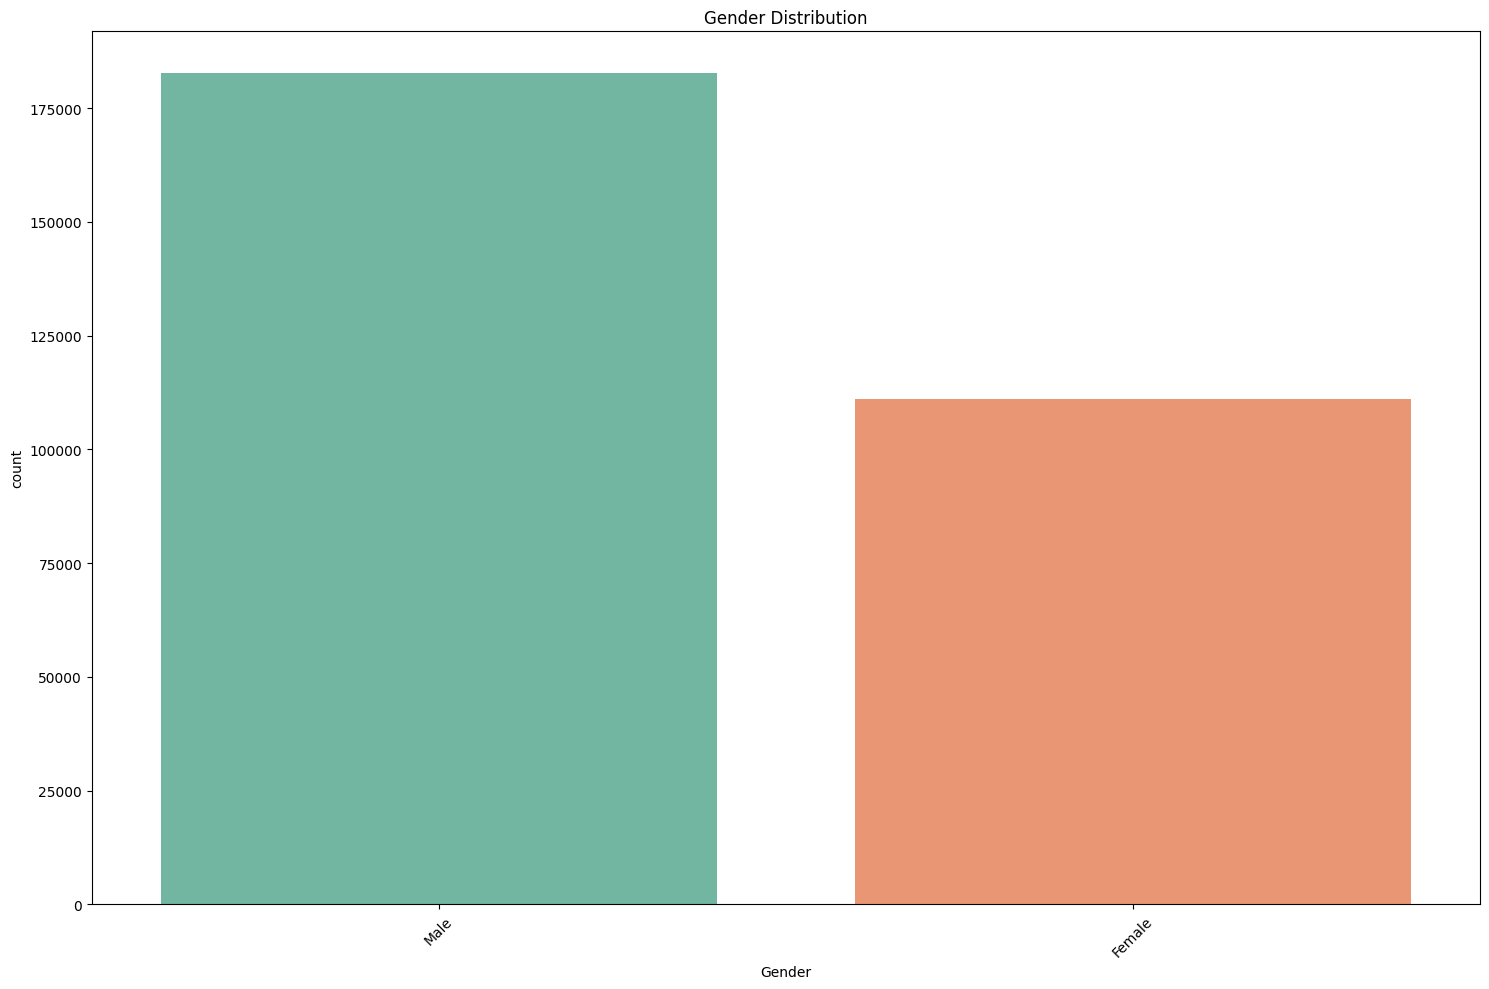

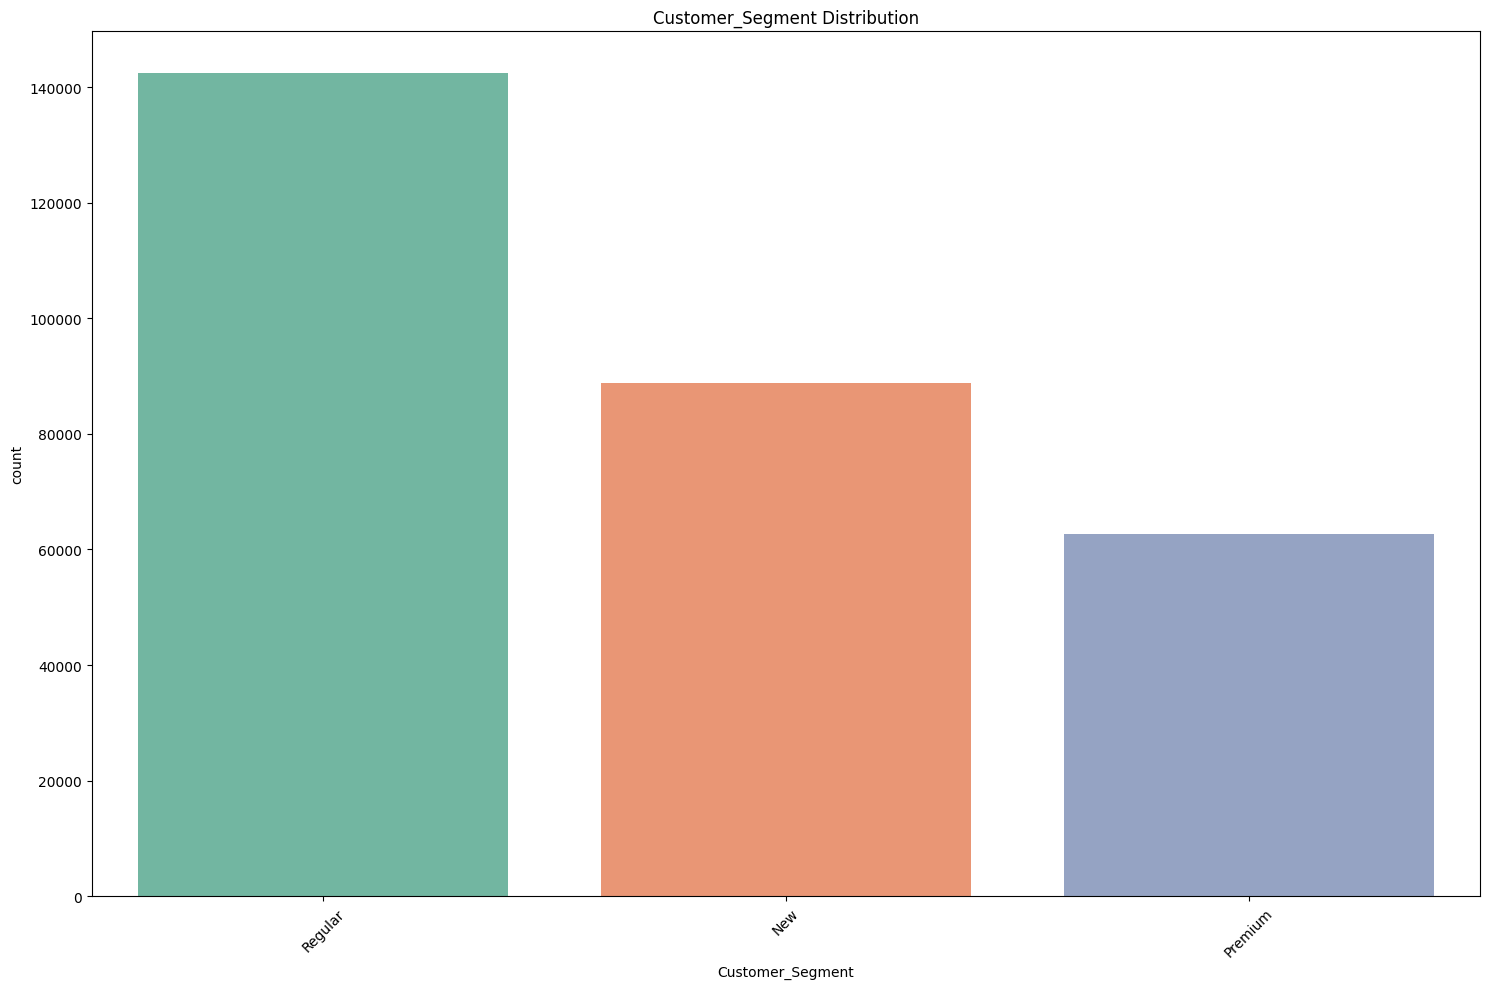

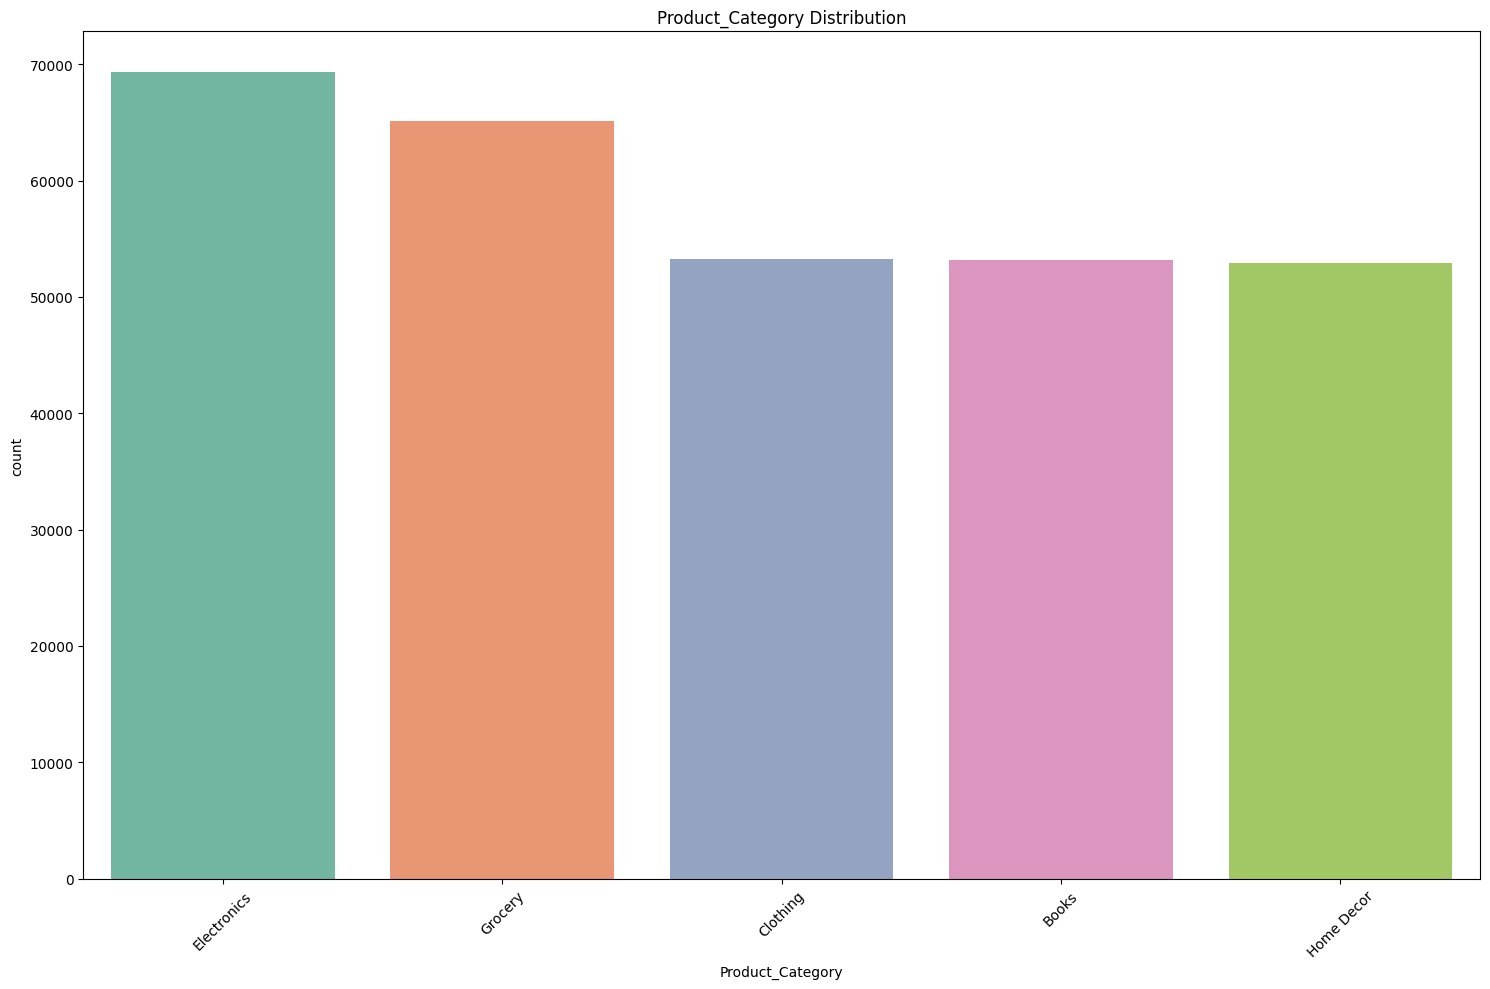

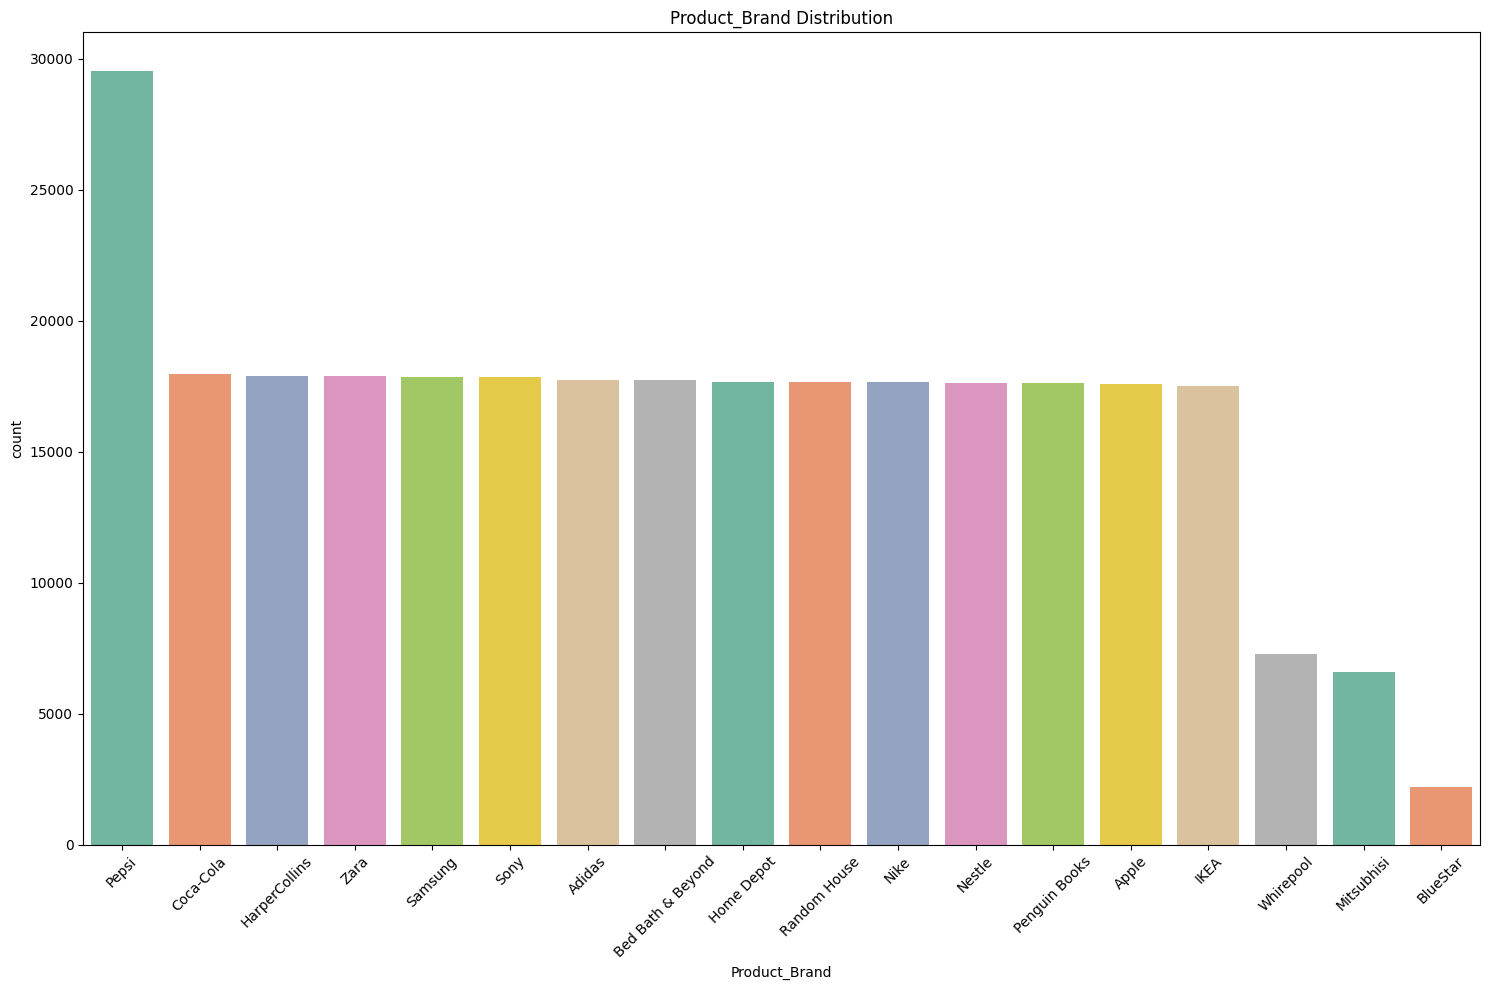

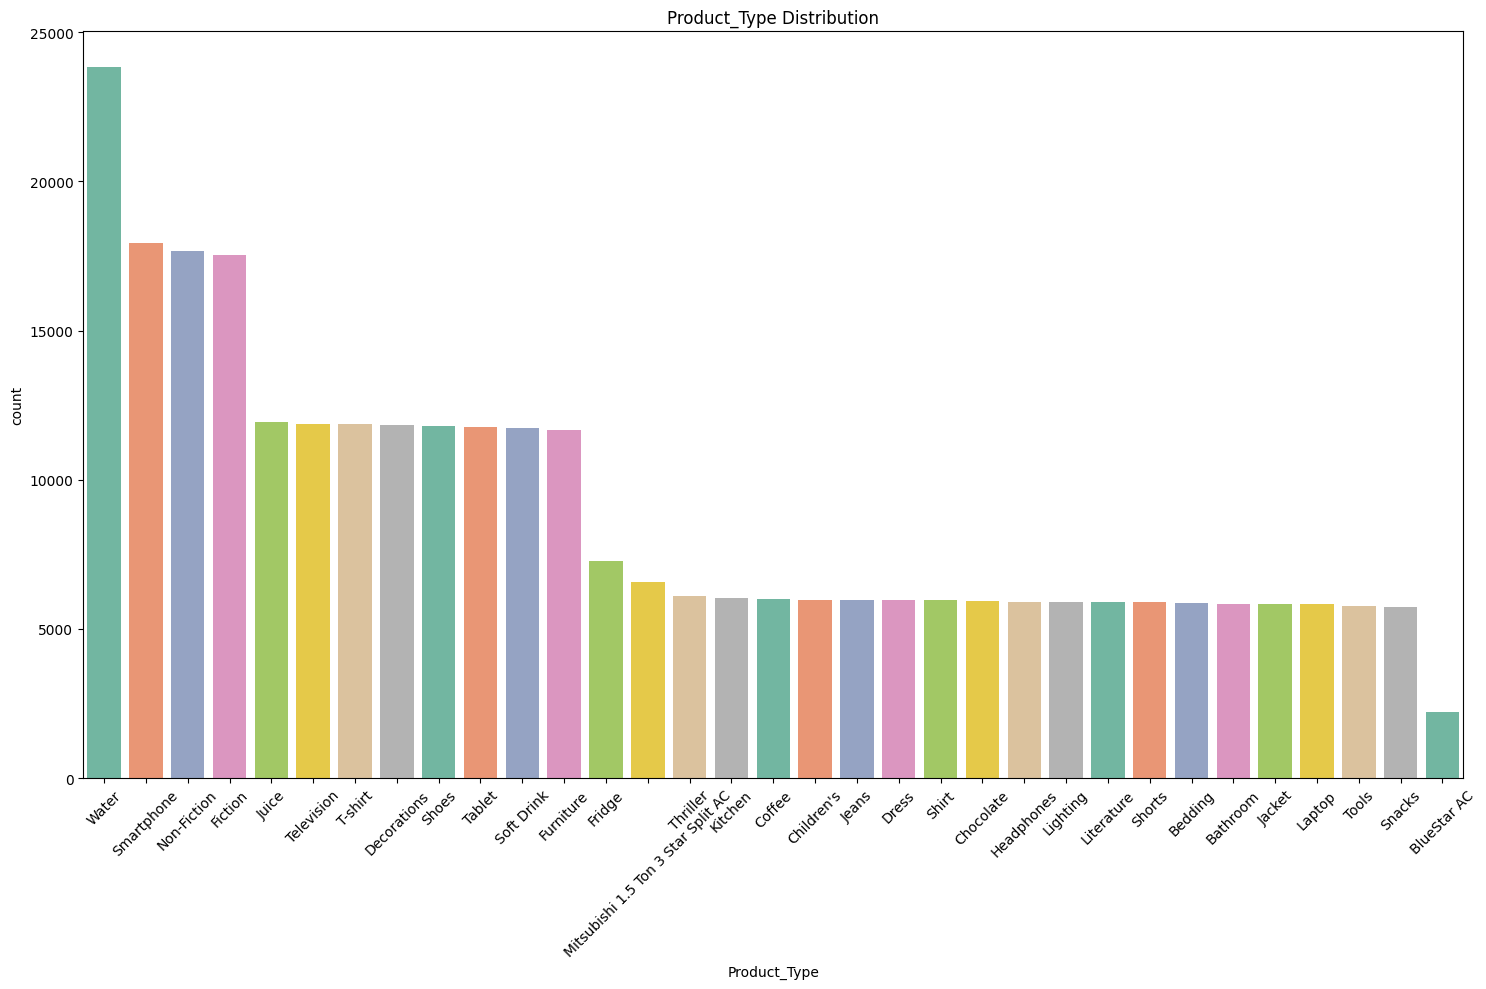

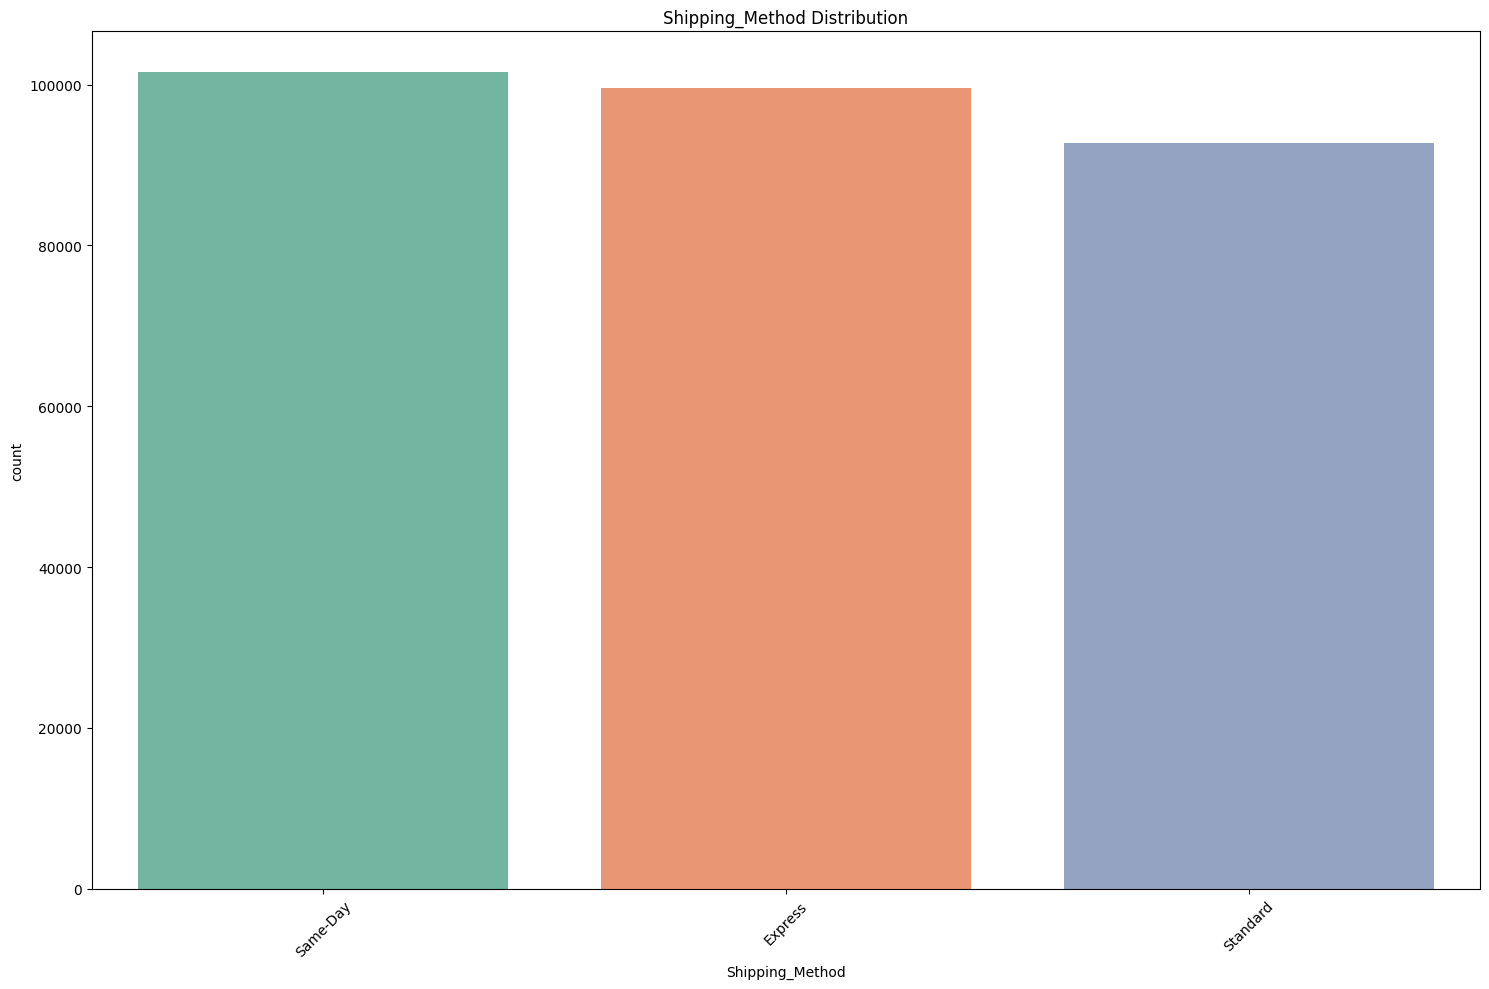

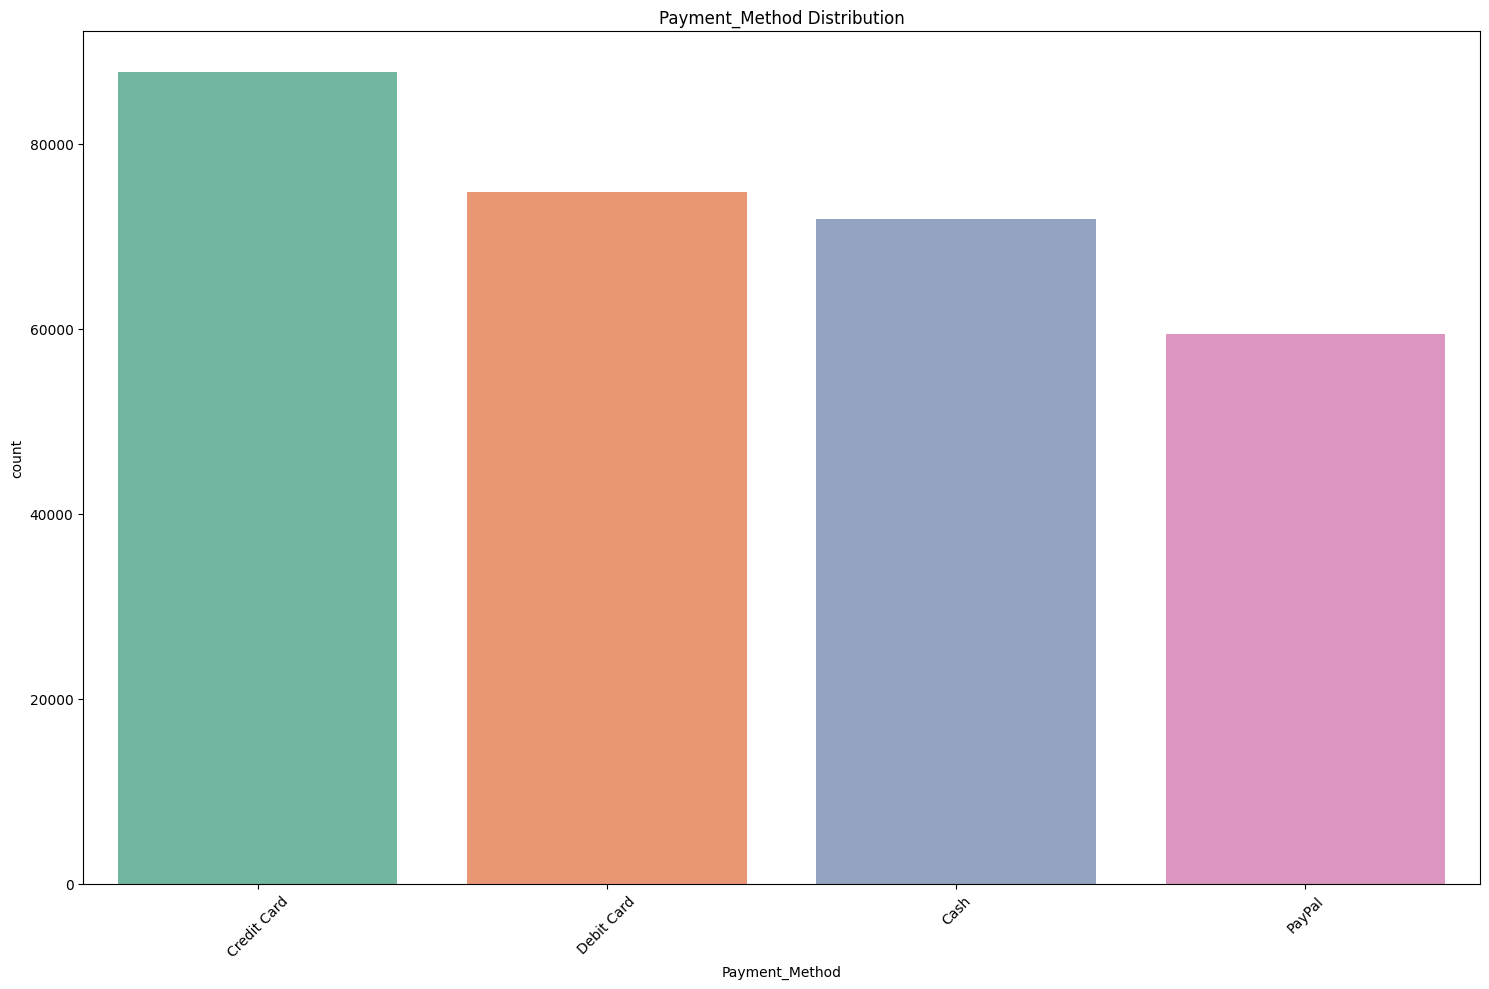

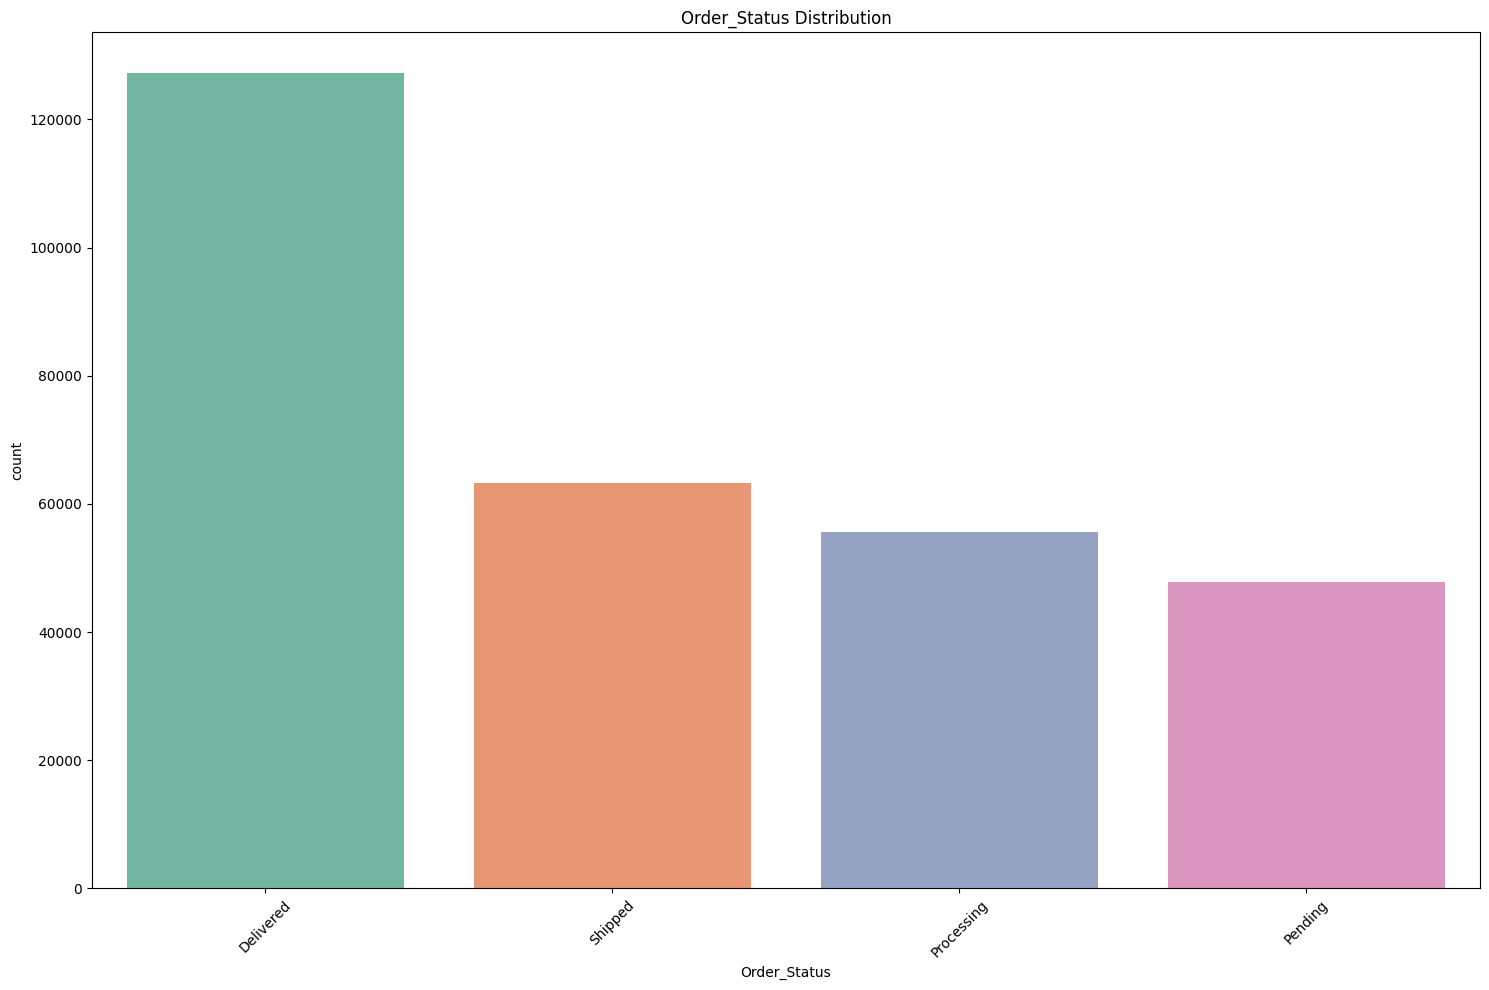

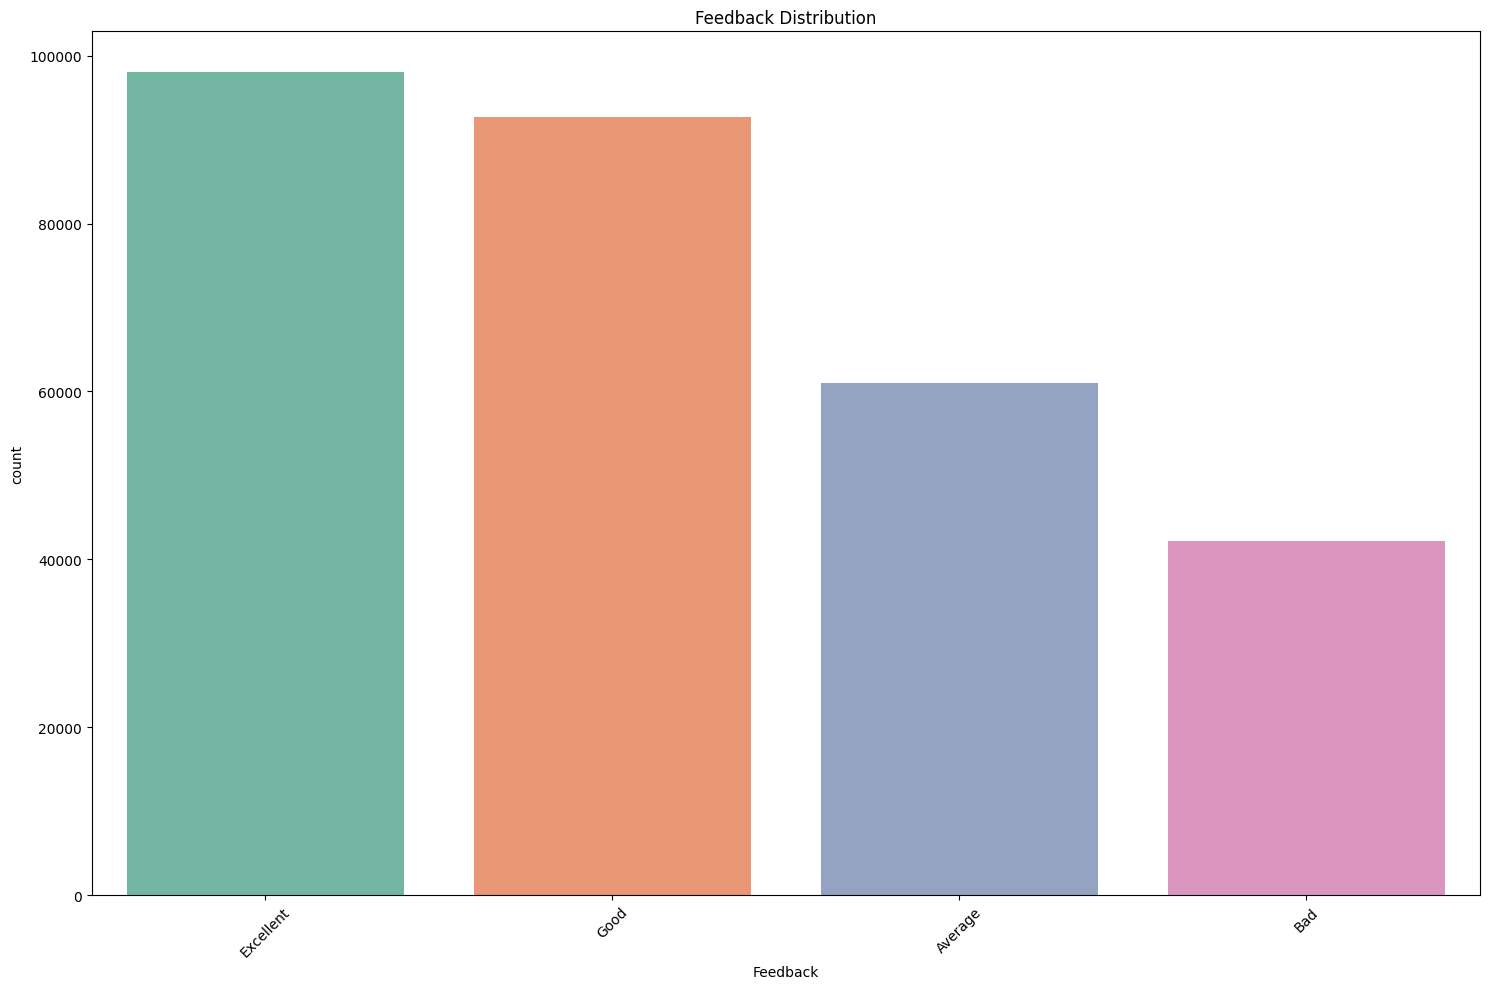

In [ ]:
cat_cols = ['Gender', 'Customer_Segment', 'Product_Category', 'Product_Brand',
            'Product_Type', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Feedback']

for col in cat_cols:
    plt.figure(figsize=(15,10))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Key Insights from EDA Graphs
1. Gender Distribution Analysis
Observations:

Male customers dominate: ~185,000 transactions vs ~110,000 female transactions

62% Male vs 38% Female customer base

Significant gender imbalance in the dataset

Business Insights:

Marketing Opportunity: Female segment is underrepresented - potential for targeted marketing campaigns

Product Strategy: Current product mix may be more appealing to male customers

Revenue Potential: Female customers might represent untapped market potential

Recommendation: Analyze if certain product categories appeal more to females and expand those segments


2. Customer Segment Distribution Analysis
Observations:

Regular customers are majority: ~142,000 transactions (48%)

New customers: ~88,000 transactions (30%)

Premium customers: ~63,000 transactions (22%)

Clear hierarchy: Regular > New > Premium

Business Insights:

Customer Acquisition Success: High number of "New" customers shows effective acquisition

Premium Segment Opportunity: Only 22% premium customers suggests room for upselling

Retention Strategy: Large "Regular" base indicates good retention but need premium conversion

Revenue Focus: Premium customers likely generate higher revenue per transaction despite lower volume


3. Product Category Distribution Analysis
Observations:

Electronics leads: ~69,000 transactions (highest volume)

Grocery follows closely: ~65,000 transactions

Balanced distribution: Other categories (Clothing, Books, Home Decor) are fairly even at ~53,000 each

No category dominance: Relatively well-distributed across all 5 categories

Business Insights:

Electronics & Grocery are key drivers: These two categories represent ~45% of all transactions

Diversified portfolio: Good category balance reduces dependency risk

Growth opportunities: Clothing, Books, and Home Decor have similar volumes - potential for growth

Inventory planning: Electronics and Grocery need higher stock levels

Cross-selling potential: Similar volumes across categories suggest successful cross-category selling


4. Product Brand Distribution Analysis
Observations:

Pepsi dominates significantly: ~29,000 transactions (10% of total)

Long tail distribution: Most brands have similar volumes (~17,000-18,000)

Clear brand hierarchy: Pepsi >> Others >> Specialized brands (Whirlpool, Mitsubishi, BlueStar at bottom)

18 different brands represented

Business Insights:

Pepsi is the star performer: Significantly outperforms other brands - key revenue driver

Brand concentration risk: Heavy dependence on Pepsi could be risky

Underperforming premium brands: Whirlpool, Mitsubishi, BlueStar have very low volumes

Opportunity for brand partnerships: Most brands have similar performance - potential for promotional partnerships

Premium brand strategy needed: Low-volume premium brands may need different marketing approach

-----------------------

Strategic Recommendations :
- Customer Segmentation Strategy

Target female customers with specific campaigns to balance gender distribution
Premium conversion programs to move Regular customers to Premium tier
Retention programs for the large Regular customer base

- Product Portfolio Optimization

Strengthen Electronics & Grocery as core categories
Develop growth strategies for Clothing, Books, and Home Decor
Cross-category bundling opportunities given balanced distribution

-  Brand Management

Leverage Pepsi's success - expand Pepsi product lines or use as anchor for promotions
Revitalize underperforming premium brands (Whirlpool, Mitsubishi, BlueStar)
Develop mid-tier brand partnerships for consistent performers

- Revenue Optimization

Focus on high-volume categories (Electronics, Grocery) for immediate impact
Develop premium offerings in underrepresented segments
Gender-specific product development to capture female market share

These insights align perfectly with your clustering results and provide a solid foundation for targeted marketing, inventory management, and business growth strategies!

------------------------------------------------------

5. Shipping Method Distribution Analysis
Observations:

Same-Day Shipping leads: ~102,000 transactions (35%)
Express Shipping: ~99,000 transactions (34%)
Standard Shipping: ~92,000 transactions (31%)
Nearly equal distribution across all three methods

Business Insights:

Premium shipping preference: 69% of customers choose faster shipping (Same-Day + Express)
Customer willingness to pay for speed: High demand for premium shipping indicates price insensitivity
Operational capacity: Strong same-day delivery infrastructure suggests advanced logistics
Revenue opportunity: Premium shipping likely generates additional revenue streams
Competitive advantage: Fast shipping capabilities differentiate from competitors


6. Payment Method Distribution Analysis
Observations:

Credit Card dominates: ~88,000 transactions (30%)
Debit Card: ~74,000 transactions (25%)
Cash: ~71,000 transactions (24%)
PayPal: ~59,000 transactions (20%)
Digital vs Traditional split: 75% digital payments vs 24% cash

Business Insights:

Digital payment adoption: 75% digital payments shows modern customer base
Credit card preference: Suggests customers comfortable with credit/installment purchases
Cash still significant: 24% cash indicates diverse customer demographics or regional preferences
PayPal underutilized: Opportunity to promote digital wallet adoption
Security & convenience: Credit/Debit card preference indicates trust in payment security


7. Order Status Distribution Analysis
Observations:

Delivered orders dominate: ~128,000 transactions (44%)
Shipped orders: ~63,000 transactions (21%)
Processing orders: ~55,000 transactions (19%)
Pending orders: ~47,000 transactions (16%)
High completion rate: 65% orders are delivered/shipped

Business Insights:

Excellent fulfillment rate: 44% delivered shows strong operational efficiency
Good processing speed: Only 35% orders still in pipeline (Processing + Pending)
Minimal bottlenecks: Smooth order flow from pending to delivered
Customer satisfaction potential: High delivery rate should correlate with satisfaction
Operational excellence: Efficient order management system in place


8. Feedback Distribution Analysis
Observations:

Excellent feedback leads: ~97,000 transactions (33%)
Good feedback: ~92,000 transactions (31%)
Average feedback: ~61,000 transactions (21%)
Bad feedback: ~43,000 transactions (15%)
Positive feedback dominance: 64% Excellent/Good vs 15% Bad

Business Insights:

Strong customer satisfaction: 64% positive feedback indicates good product/service quality
Room for improvement: 36% Average/Bad feedback represents improvement opportunity
Quality consistency: Significant "Excellent" ratings suggest consistent high-quality products
Customer loyalty potential: High satisfaction likely drives repeat purchases
Brand reputation: Positive feedback supports strong brand image


Cross-Metric Strategic Insights:
1. Premium Service Strategy

Fast shipping + Credit cards: Customers willing to pay premium for speed and convenience
Target premium segments: High same-day shipping usage suggests affluent customer base
Upselling opportunity: Promote express shipping to standard shipping users

2. Operational Excellence

High delivery rate + Positive feedback: Strong correlation between fulfillment and satisfaction
Efficient pipeline: Good balance between processing stages
Quality control: High "Excellent" ratings indicate effective quality management

3. Payment Modernization

Digital payment growth: 75% digital adoption shows tech-savvy customers
Cash reduction strategy: Gradually move cash customers to digital payments
PayPal promotion: Opportunity to increase digital wallet usage

4. Customer Experience Optimization

Feedback-driven improvements: 15% bad feedback provides specific improvement areas
Service differentiation: Premium shipping as competitive advantage
Satisfaction correlation: Link between fast delivery and positive feedback


Recommendations for Business Growth:
1. Shipping Strategy

Expand same-day delivery to capture more premium customers
Introduce shipping subscription models for frequent buyers
Optimize standard shipping to reduce customer churn to competitors

2. Payment Innovation

Promote PayPal and digital wallets through incentives
Introduce buy-now-pay-later options for credit card users
Develop mobile payment solutions for tech-savvy segments

3. Quality Enhancement

Focus on converting "Average" to "Good" feedback (21% improvement potential)
Analyze "Bad" feedback patterns to identify specific product/service issues
Implement feedback-driven product improvements

4. Operational Scaling

Maintain delivery excellence while scaling operations
Reduce processing time for pending orders
Develop predictive analytics for demand forecasting

Ratings Distribution

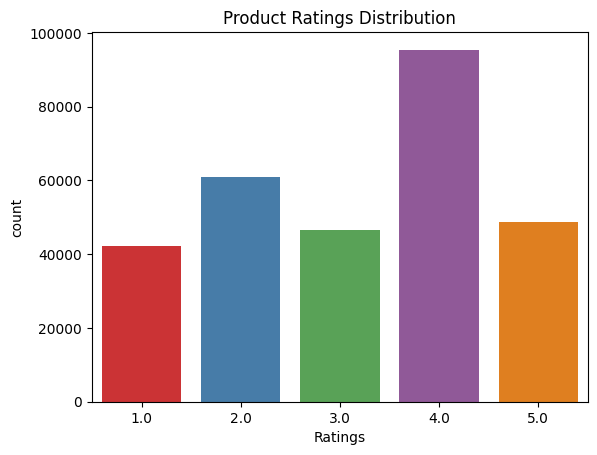

In [ ]:
sns.countplot(x='Ratings', data=df, palette='Set1')
plt.title("Product Ratings Distribution")
plt.show()


Product Ratings Distribution – Key Insights

 Rating Pattern Overview

  - Most products (around 95,000) have 4-star ratings – making up 32% of all ratings.

   - Shows customers are generally happy, but there’s room to improve.

  Overall trend is skewed toward higher ratings (more 4- and 5-star reviews).

Business Insights
1. Quality Gap

- Low-rated products (1–2 stars): ~103,000 (35%)

-  High-rated products (4–5 stars): ~144,000 (49%)
   - Suggests inconsistent quality across your product range.

2. Impact on Revenue

- 4-star products are your core strength – small changes could upgrade them to 5-star.

- 1-star products (~43,000) are a churn risk and may attract negative reviews.

- 3-star products (~47,000) are neutral – ideal for targeted improvements.

3. Suggested Steps

- Review 1-star products: Check for quality issues, pricing problems, or supplier issues.

-  Enhance 4-star products: Minor improvements can boost ratings and customer loyalty.

- Fix 3-star products: Improve quality or adjust positioning.

4. Key Metrics to Monitor

- Rating shifts: Track how products move across rating levels over time.

- Volume-weighted average rating: High number of 4-star ratings may hide losses from poorly rated products.

- Category-wise trends: Different product categories may have different rating norms.

#### Bivariate Analysis

Total Purchases vs Product Category

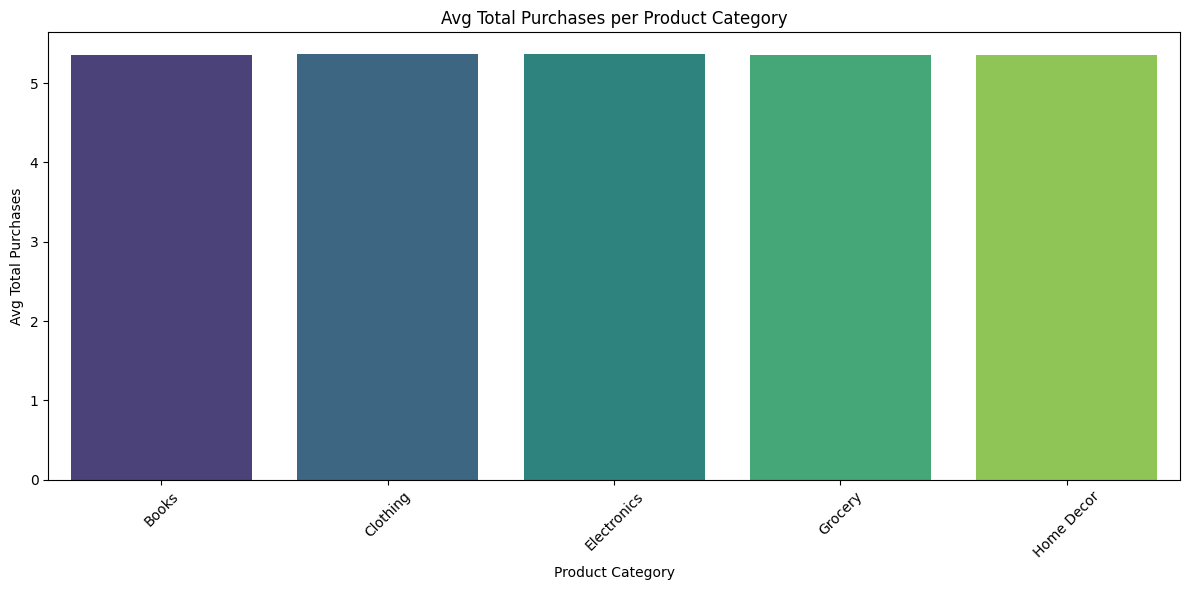

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='Product_Category',
    y='Total_Purchases',
    data=df,
    estimator=np.mean,
    ci=None,
    palette='viridis'
)
plt.title("Avg Total Purchases per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Avg Total Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Payment Method vs Total Amount

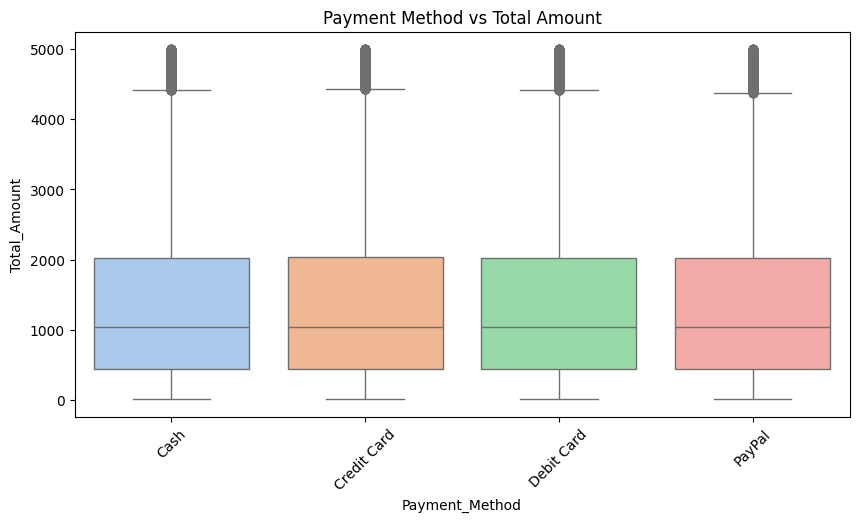

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Payment_Method', y='Total_Amount', data=df, palette='pastel')
plt.title("Payment Method vs Total Amount")
plt.xticks(rotation=45)
plt.show()


 Feedback vs Ratings

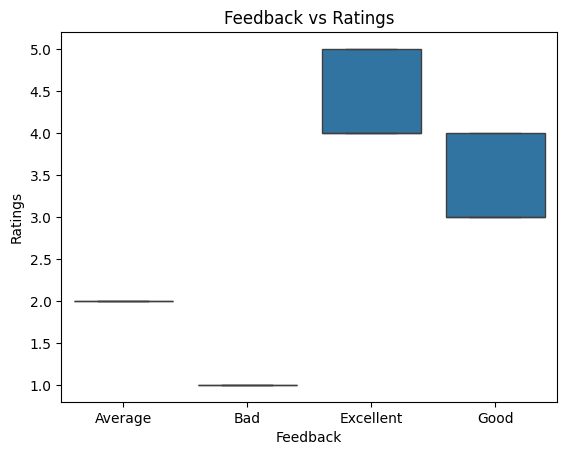

In [ ]:
sns.boxplot(x='Feedback', y='Ratings', data=df)
plt.title("Feedback vs Ratings")
plt.show()


Income vs Total Amount

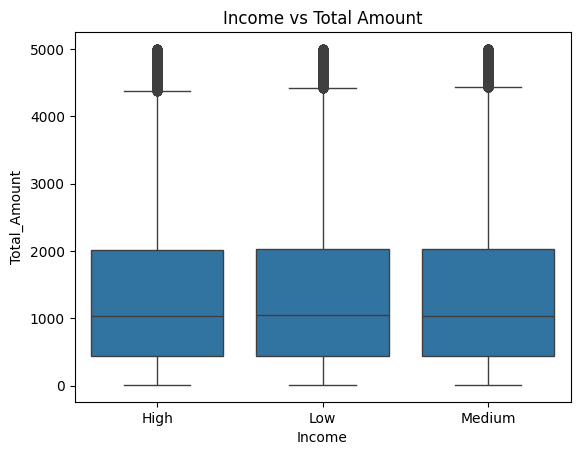

In [ ]:
sns.boxplot(x='Income', y='Total_Amount', data=df)
plt.title("Income vs Total Amount")
plt.show()


Average Ratings per Feedback Category

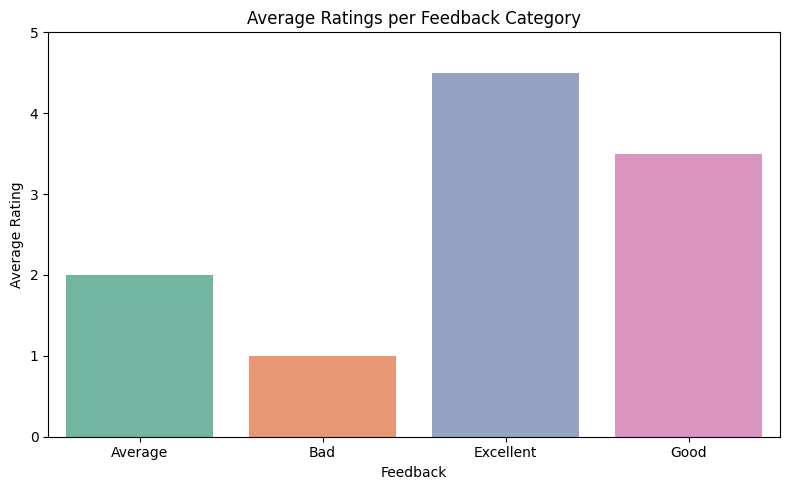

In [ ]:
# Step 1: Group by Feedback and calculate average Ratings
feedback_avg_ratings = df.groupby('Feedback')['Ratings'].mean().reset_index()

# Step 2: Sort by rating for better visualization (optional)
feedback_avg_ratings = feedback_avg_ratings.sort_values(by='Ratings', ascending=False)

# Step 3: Plot using seaborn barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=feedback_avg_ratings, x='Feedback', y='Ratings', palette='Set2')
plt.title("Average Ratings per Feedback Category")
plt.xlabel("Feedback")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # Ratings are between 1 and 5
plt.tight_layout()
plt.show()


 Insights –

1. Average Purchases per Product Category

- Key Insight: Purchase behavior is almost the same across all categories (~5.4 average purchases).

  - Books lead slightly (~5.5), others follow closely (~5.3–5.4).

Business Impact:

- No strong category preference :  Customers buy evenly across all types.

- Simplifies inventory planning : Easier to forecast stock.

- Marketing focus : Instead of increasing purchase frequency, aim to increase value per order.

2. Payment Method vs Total Spending

- Key Insight: Spending is not affected by payment method.

  - Median: ~ $ 1000 | Upper 25 % : ~ $ 2000 | Outliers: ~$5000 — consistent across all methods.

Business Impact:

- No payment friction → Customers spend the same regardless of method.

- Monitor large transactions → High-value purchases happen across all methods.

- Promotions based on payment method may not increase spending.

3. Feedback vs Ratings

- Key Insight: Feedback and ratings perfectly match.

  - Excellent feedback → 4–5 stars

  - Good → 3–4 stars

  - Average → ~2 stars

  - Bad → ~1 star

Business Impact:

- Data is reliable → Feedback and ratings are in sync.

- Customer behavior is consistent.

- Actionable next step → Improve “Good” products to make them “Excellent”.

4. Income vs Total Spending

- Key Insight: Spending is not linked to income level.

   - Low, Medium, High income groups all spend the same (~$1000 median, similar spread).

Business Impact:

- pricing is inclusive → Appeals to all income levels.

- Upsell opportunity → Premium products for high-income customers.

-  Income may not be useful for targeting.

5. Ratings by Feedback Category

 - Key Insight: Ratings clearly follow a quality ladder.

  - Excellent → ~4.5, Good → ~3.5, Average → ~2.0, Bad → ~1.0

Strategic Insight:

- Quality roadmap:

    - Fix Bad : Average: Major improvements needed

    - Improve Average : Good: Big opportunity

    - Tune Good : Excellent: For premium appeal


Strategic Cross-Insights & Recommendations
1. Focus Beyond Demographics

 -  Income & payment method don’t affect spending
    -  Prioritize product quality over customer type

2. Make Quality the Core Strategy

  - Feedback and ratings match perfectly
    - Invest in moving products up the ladder:
      Average → Good → Excellent

3. Maintain Category Balance

 - Purchases are evenly spread across categories
    - Keep this balance while boosting order value

4. Improve Recommendations

  - Use feedback categories (Excellent, Good, etc.) in your algorithm
    -  Recommend top-rated products to boost satisfaction

#### Multivariate Analysis

Heatmap of Numerical Correlation

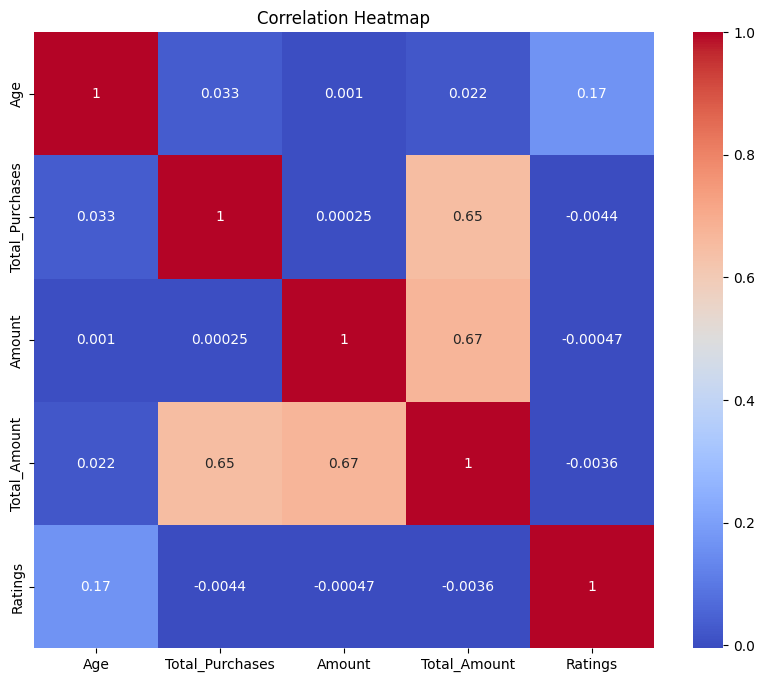

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Pairplot for Core Metrics

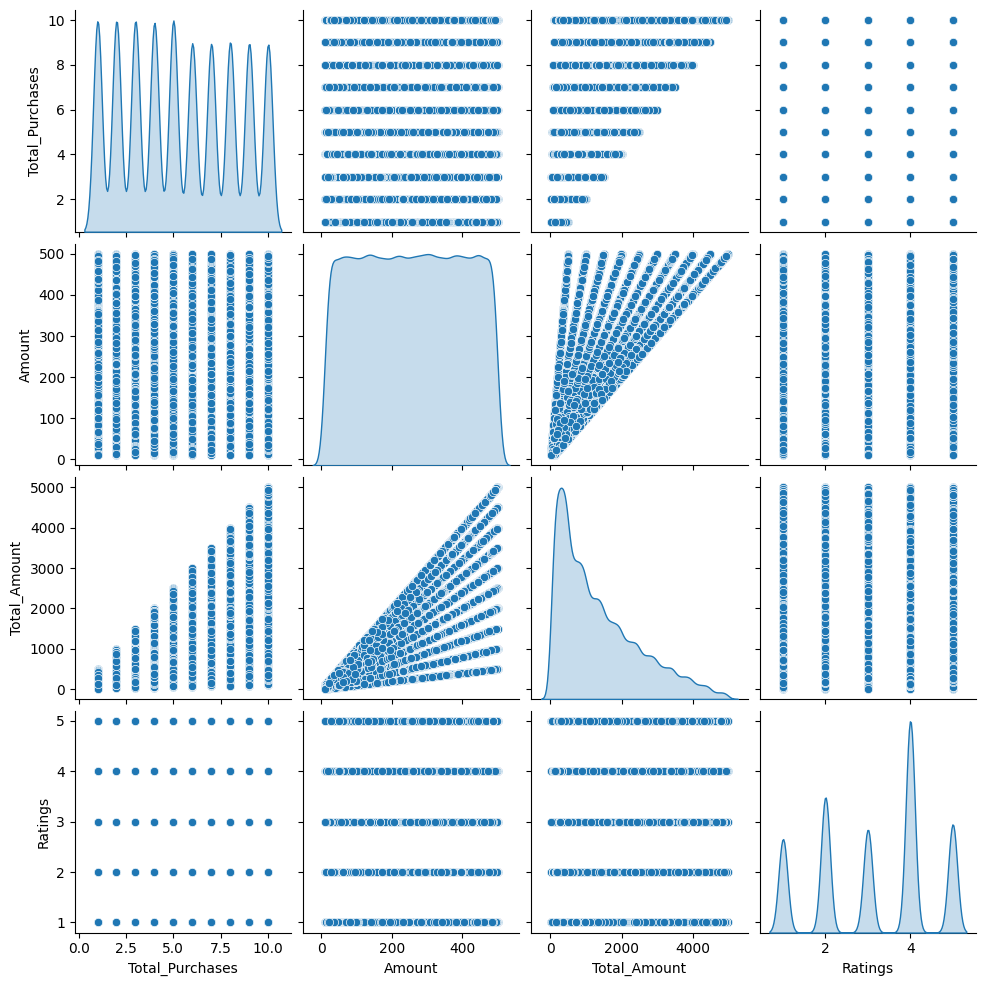

In [ ]:
sns.pairplot(df[['Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']], diag_kind='kde')
plt.show()


Ratings vs Category & Brand (Grouped)

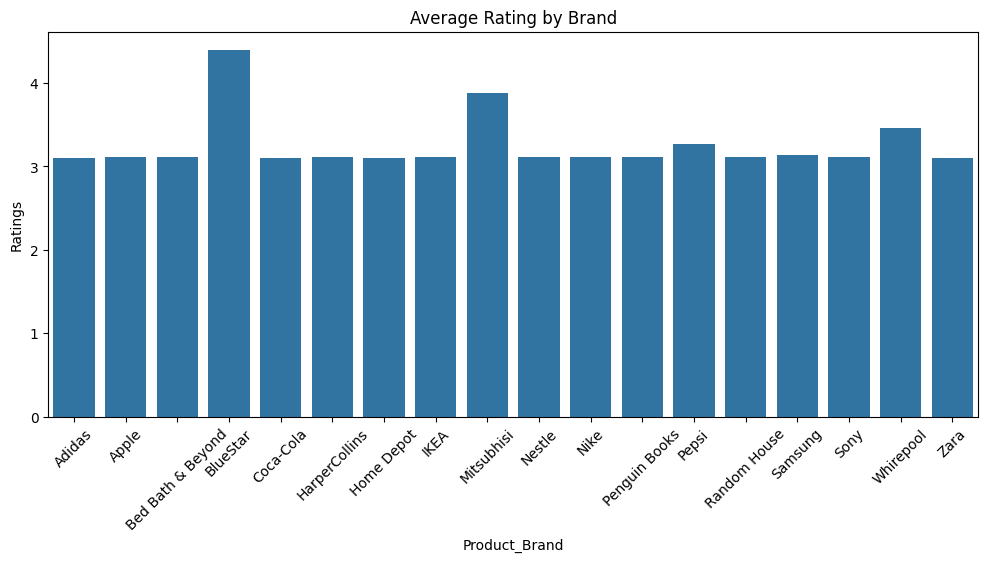

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Product_Brand', y='Ratings', data=df, ci=None, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Rating by Brand')
plt.show()


Insights

1. Correlation Heatmap – Key Relationships Between Numbers

Key Findings:

- Amount - Total_Amount: Strong positive correlation (0.67)
  -  The higher the value of each purchase, the more a customer spends overall.

- Total_Purchases - Total_Amount: Also strongly correlated (0.65)
  - People who buy more often spend more in total.

- Ratings - Financial metrics: Very weak or no correlation (-0.0036 to -0.0047)
    - How much someone spends has no link to how they rate products.

- Age - Spending/Frequency: Minimal correlation (0.001 to 0.17)
    - Age doesn’t influence how much or how often people buy.

2. Pairplot Matrix – How Variables Are Distributed

Patterns Observed:

  - Total_Purchases:

       Appears in even steps (2, 4, 6, etc.) → Suggests systematic or fixed buying patterns

      Spread is uniform across those levels

  - Amount & Total_Amount:

      Both are right-skewed → Most purchases are small, a few are very large

      Clear linear relationship between them → Higher amount per order means higher total spend

  - Ratings:

      Only 5 possible values (1–5)

      4-star is the most common

      Distribution is roughly normal around ratings 3 and 4


3. Average Rating by Brand – Brand Performance Overview

Key Insights:

  - Top Performer: BlueStar with an average rating of ~4.4

  - Second Best: Mitsubishi (~3.9)

  - Above Average: Whirlpool (~3.5)

  - Most brands fall in a tight range: 3.1–3.4 average rating

  - No brand rated below 3.0 → No poor performers

  - Overall, brand performance is very consistent, suggesting similar quality standards

Summary Takeaways:

  - Spending behavior is driven by how much and how often people buy — not by age or ratings

  - Purchasing patterns are structured and predictable (especially in purchase frequency)

  - Product quality (ratings) is evenly distributed across brands — no major winners or losers

  - Use this data to fine-tune strategies like product bundling, brand positioning, or customer targeting

#### Temporal Analysis

Monthly Trends in Sales

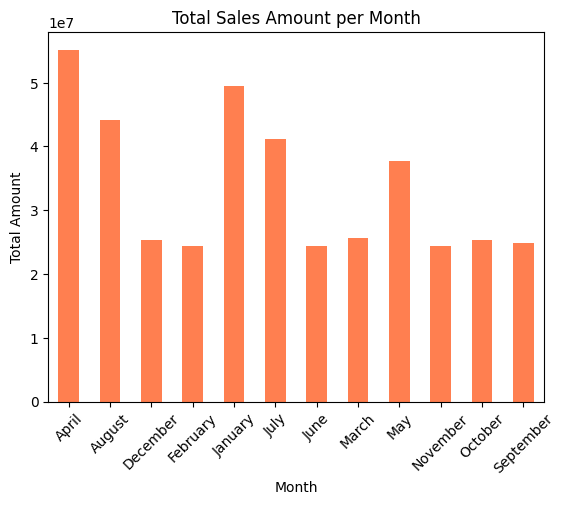

In [ ]:
monthly_sales = df.groupby('Month')['Total_Amount'].sum().sort_index()
monthly_sales.plot(kind='bar', color='coral')
plt.title("Total Sales Amount per Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


Year-wise Sales

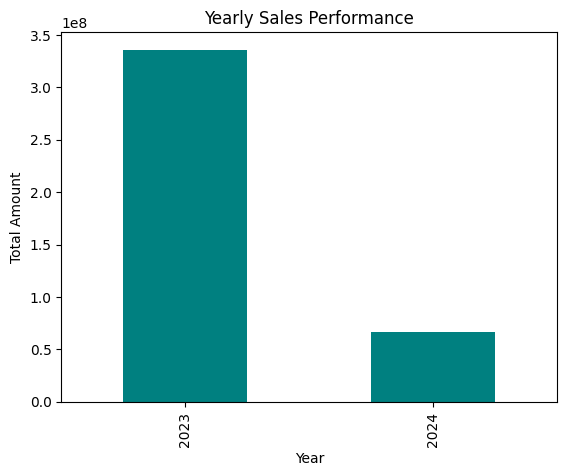

In [ ]:
yearly_sales = df.groupby('Year')['Total_Amount'].sum()
yearly_sales.plot(kind='bar', color='teal')
plt.title("Yearly Sales Performance")
plt.ylabel("Total Amount")
plt.show()


 Hour of Day Purchase Trend

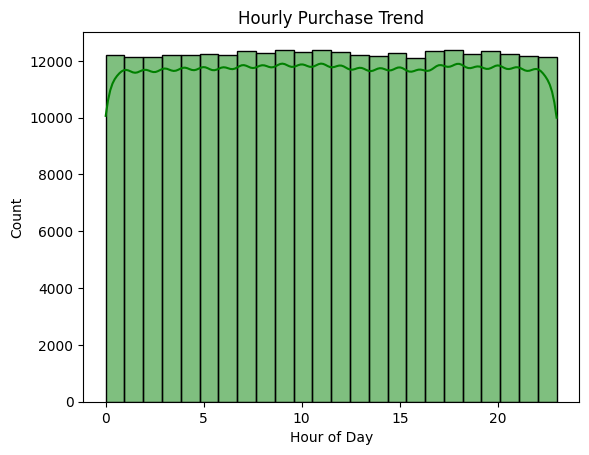

In [ ]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
sns.histplot(df['Hour'], bins=24, kde=True, color='green')
plt.title("Hourly Purchase Trend")
plt.xlabel("Hour of Day")
plt.show()


Pure Temporal EDA Insights –

1. Monthly Sales – Seasonal Trends

- Monthly Sales Highlights:

  - April: Highest sales (~$55M)

  - January: Second highest (~$50M)

  - August: Strong (~$45M)

  - December, February, June: Lowest (~$25M each)

- Key Insight:

  - Sales vary significantly across months — April’s sales are 2.2x higher than low months.

  - No clear quarterly trend → April spike is isolated, not part of a seasonal surge.

  - Mid-year months (Jul–Sep) show moderate sales (~$25–40M).

2. Yearly Sales – Sharp Drop in 2024

- Yearly Totals:

  - 2023: ~$340M

  - 2024: ~$65M
     - 80% drop (a 5.2x difference)

- Key Insight:

  - Likely cause: Incomplete data for 2024 (e.g., partial-year capture)

  - Less likely: Sudden business decline
    - Suggests the drop is due to reporting or data period, not actual sales collapse.



 3. Hourly Sales – Unusual Uniformity

- Hourly Trends:

  - Flat activity across all 24 hours (~12,000 purchases/hour)

  - Less than 5% difference between highest and lowest hours

  - No peak hours like morning, lunch, or evening

- Key Insight:
This uniform pattern is very unusual in retail and could mean:

  - Global customer base across different time zones

  - Automated/24×7 systems handling purchases

  - Artificial/random timestamps in the dataset

  - Data processing issues



- This behavior doesn’t match normal consumer patterns, where sales usually peak at specific times.


#### Categorical Data Analysis

Product Category Share

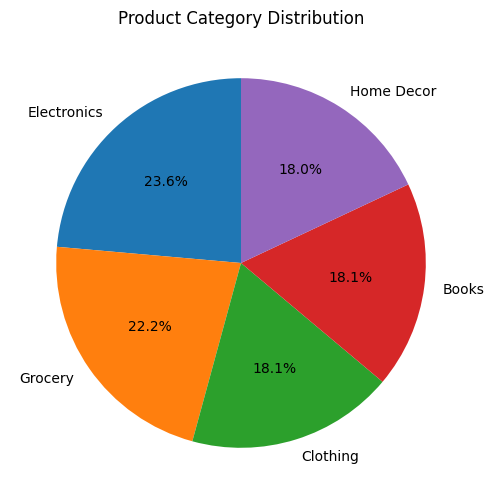

In [ ]:
df['Product_Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Product Category Distribution")
plt.ylabel('')
plt.show()


Shipping Method Popularity

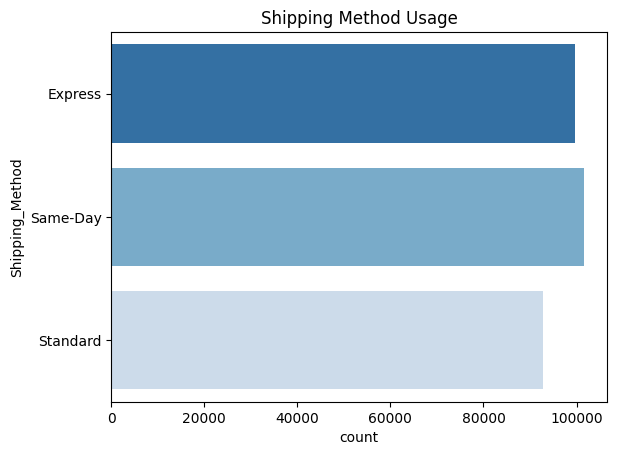

In [ ]:
sns.countplot(y='Shipping_Method', data=df, palette='Blues_r')
plt.title("Shipping Method Usage")
plt.show()


Order Status by Brand

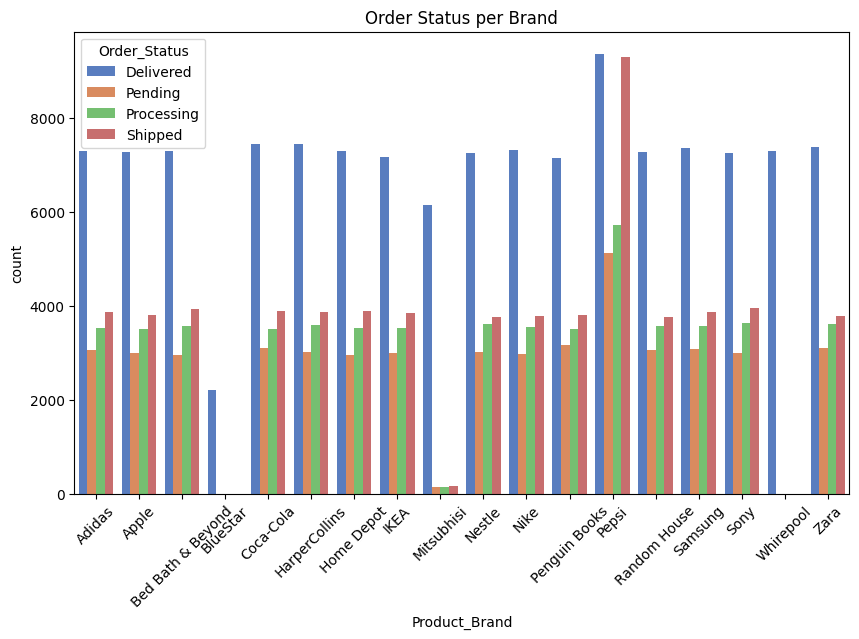

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product_Brand', hue='Order_Status', palette='muted')
plt.title("Order Status per Brand")
plt.xticks(rotation=45)
plt.show()


Insights:

Graph 1: Product Category Distribution

- Key Insights:

  - Balanced Mix: Product categories are evenly distributed.

      - Electronics leads (23.6%), followed by:

      - Grocery (22.2%)

      - Clothing (18.1%)

      - Books (18.1%)

      - Home Decor (18.0%)

  - No single category dominates → Strong, diversified portfolio

- Business Impact:

  - Lower risk: No over-reliance on one product type

  - Cross-sell potential: Even category sizes make bundling easier

  - Inventory planning: Allocate stock based on category size, with a bit more focus on Electronics

Graph 2: Shipping Method Usage

- Key Insights:

  - Express Shipping is the most used (~100K orders)

  - Same-Day is close behind → High demand for fast delivery

  - Standard Shipping is least used

- Business Impact:

  - Customer behavior: Speed matters more than saving on shipping

  - Revenue opportunity: Premium shipping options can boost income

  - Logistics focus: Invest in express/same-day delivery

  - Edge over competitors: Fast shipping can be your strength


Graph 3: Order Status by Brand

- Key Insights:

  - Penguin Books stands out: ~9K “Shipped” orders
    - Could mean:

      - Bulk/seasonal orders

      - Popular product spike

      - Possible shipping delay or backlog

  - Most brands: Steady order volumes (~3K–4K)

  - Some brands (e.g., IKEA, Bed Bath & Beyond): Lower order levels

- Business Impact:

  - Supply Chain Alert: Penguin Books may need extra shipping resources

  - Brand Insight: Understand what drives Penguin’s high demand

  - Improve Operations: Plan fulfillment for demand surges

  - Marketing Needs: Support underperforming brands


- Strategic Recommendations:

   - Shipping Strategy: Invest in express delivery infrastructure as it drives customer satisfaction

   - Brand Focus: Analyze Penguin Books' success factors for replication across other categories
   
   - Category Balance: Maintain current diversification while exploring Electronics sub-categories

   - Operational Scaling: Build flexible fulfillment systems to handle brand-specific demand spikes

#### Geographic (Country, State, City) Data Analysis

Country-wise Total Sales (Total_Amount)

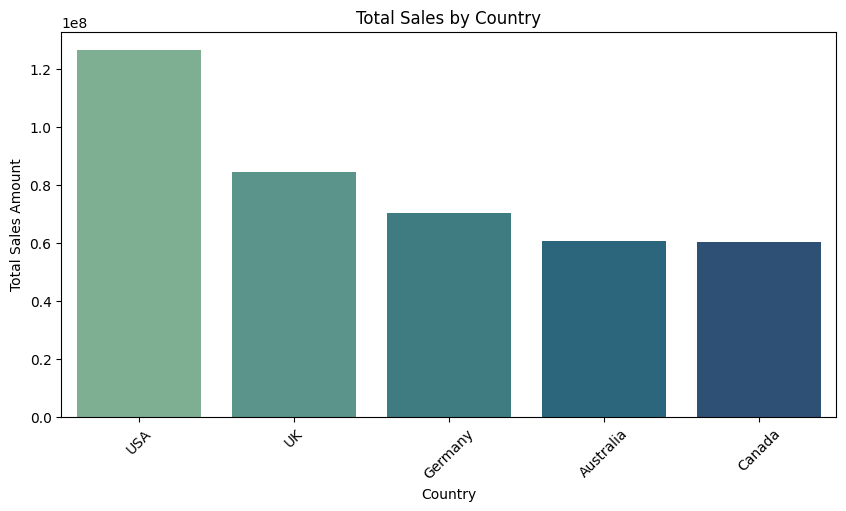

In [ ]:
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="crest")
plt.title("Total Sales by Country")
plt.ylabel("Total Sales Amount")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


 Country-wise Average Purchase per Transaction

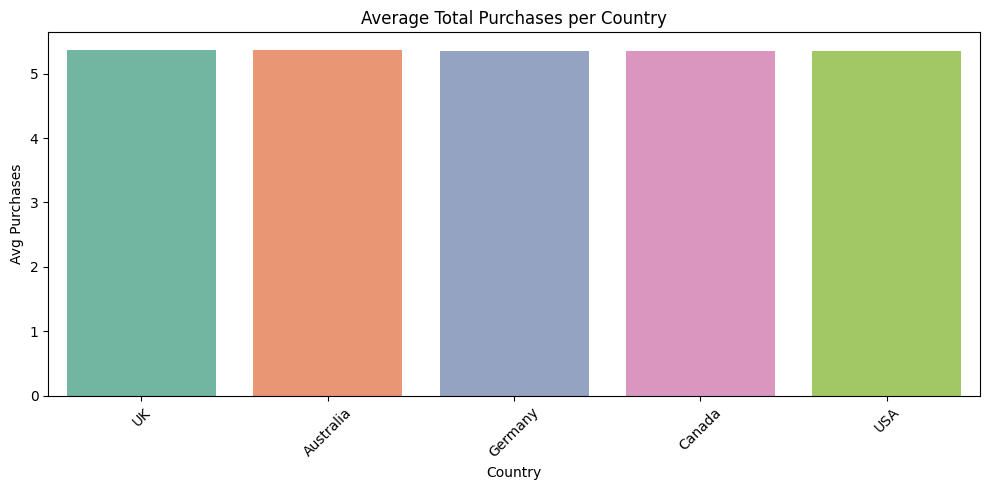

In [ ]:
# Group by country and compute mean of Total_Purchases
country_avg_purchases = (
    df.groupby('Country')['Total_Purchases']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=country_avg_purchases.index, y=country_avg_purchases.values, palette="Set2")
plt.title("Average Total Purchases per Country")
plt.ylabel("Avg Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


State-wise Total Amount

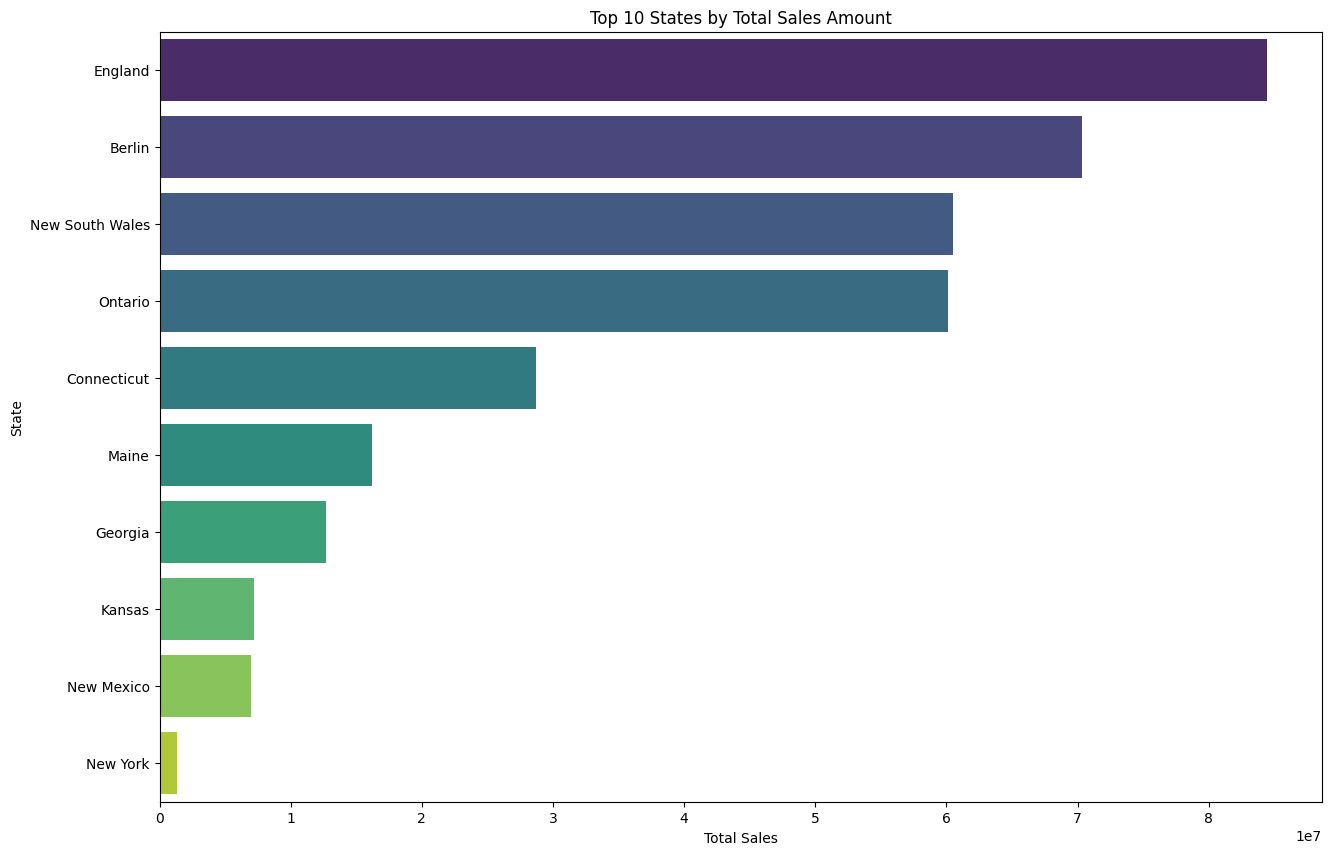

In [ ]:
state_sales = df.groupby('State')['Total_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")
plt.title("Top 10 States by Total Sales Amount")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()


Top Cities by Total Sales

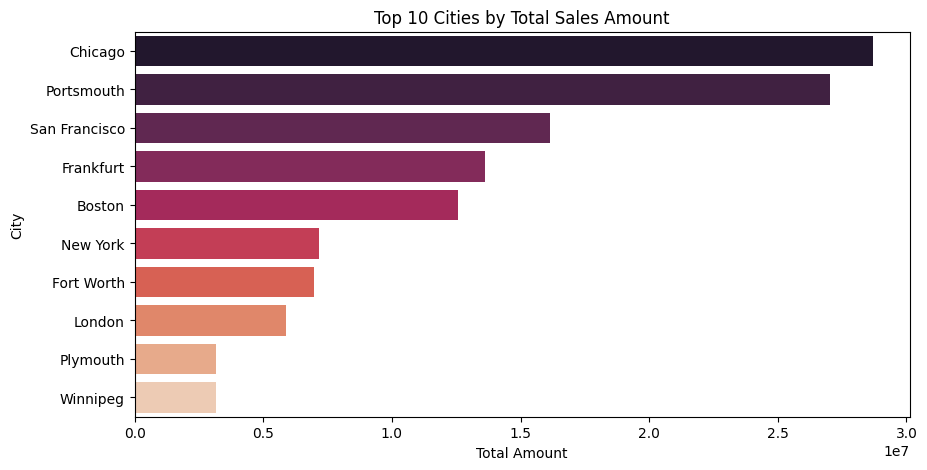

In [ ]:
city_sales = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="rocket")
plt.title("Top 10 Cities by Total Sales Amount")
plt.xlabel("Total Amount")
plt.ylabel("City")
plt.show()


Cities with Highest Average Ratings

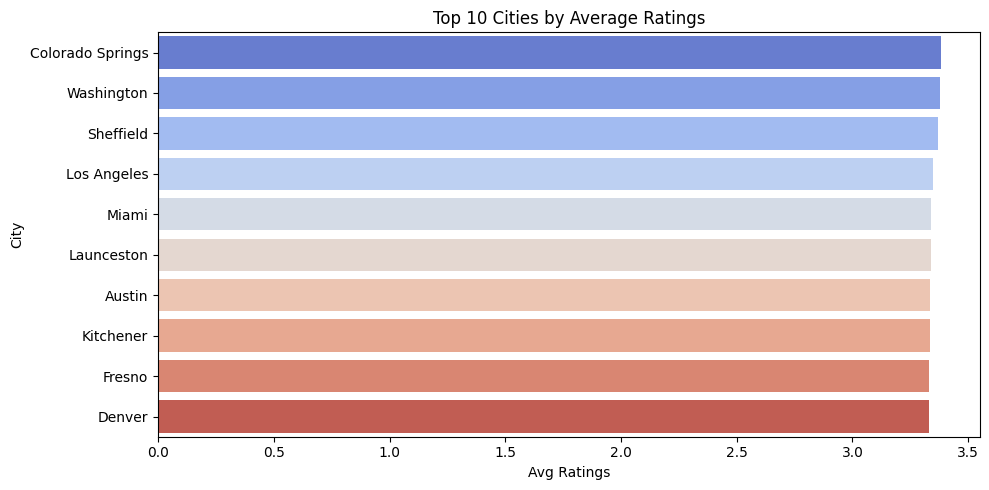

In [ ]:
top_cities_by_rating = (
    df.groupby('City')['Ratings']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities_by_rating.values, y=top_cities_by_rating.index, palette="coolwarm")
plt.title("Top 10 Cities by Average Ratings")
plt.xlabel("Avg Ratings")
plt.ylabel("City")
plt.tight_layout()
plt.show()


Geographic EDA Insights:

Graph 1: Total Sales by Country

- Key Insights:

  - USA leads with - $127M in sales — nearly double the UK’s - $84M.

  - UK, Germany, Australia, and Canada follow closely (~$61–84M range).

  - Balanced sales outside the US show strong international presence.

Business Impact:

  - Focus resources (marketing, logistics) on the US market.

  - Tailor offerings to US preferences.

  - Grow secondary markets (UK, Germany, etc.) with targeted campaigns.


Graph 2: Avg. Total Purchases per Country

- Key Insights:

  - All countries show similar purchase patterns (~5.3–5.5 avg. purchases).

  - Customers behave consistently across geographies.

- Business Impact:

  - Standardized bundling and cross-sell strategies can work globally.

  - Inventory planning is easier with uniform demand.

  - Pricing can remain consistent across countries.


Graph 3: Top 10 States by Sales

- Key Insights:

  - England ($85M) and Berlin ($70M) are top performers.

  - Other strong regions: New South Wales, Ontario, Connecticut.

  - Big drop after top 4 states → shows concentrated customer base.

- Business Impact:

  - Set up distribution hubs in top-performing regions.

  - Strengthen local presence in England and Berlin.

  - Investigate underperforming states for missed opportunities.


Graph 4: Top 10 Cities by Sales

- Key Insights:

  - Chicago tops the list (~$29M), followed by Portsmouth (~$27M).

  - High-performing cities span multiple countries (US, UK, Germany).

  - Sales are centered in major metro areas.

- Business Impact:

  - Run city-specific marketing campaigns.

  - Improve logistics and shipping in these key cities.

  - Store inventory close to high-demand urban areas.


Graph 5: Top 10 Cities by Avg. Ratings

- Key Insights:

  - All top cities have high average ratings (3.2–3.4).

  - Good product quality across all regions.

  - Top-rated cities don’t always match top sales cities.

- Business Impact:

  - Consistent high ratings = strong global brand.

  - Cities with high ratings but low sales are growth opportunities.

  - Maintain quality to support premium pricing.



Strategic Geographic Recommendations

  - Double Down on the USA: It’s your biggest market → more marketing, better logistics.

  - Expand in Europe: Focus on England and Germany for EU growth.

  - City Strategy:

      - Target big cities with marketing + fast delivery.

      - Prioritize urban inventory placement.

  - Leverage Quality:

      - Use strong ratings to charge premium prices in new markets.

      - Maintain current quality levels globally.

  - Spot New Opportunities:

      - Target cities with high ratings but low sales for future campaigns.



#### Statistical Test

1. Chi-Square Test – Product Category vs Customer Segment

- Objective: Are product categories associated with customer segments?
- Business Insight: Helps in product segmentation – if certain segments prefer specific product categories, you can tailor marketing/promotion.

------

- Null Hypothesis : H0: No relationship between product category and customer segment.
- Alternative Hypothesis : H1: There is an association.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Crosstab between Product Category and Customer Segment
contingency = pd.crosstab(df['Product_Category'], df['Customer_Segment'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print("Reject H0: There is a significant relationship between Product Category and Customer Segment.")
else:
    print("Fail to Reject H0: No significant relationship found.")


Chi-Square Statistic: 362.6038141615071
P-value: 1.8443524904072548e-73
Reject H0: There is a significant relationship between Product Category and Customer Segment.


2. Kruskal-Wallis H Test (Non-parametric ANOVA)  – Product Category vs Total_Amount

- Objective: Does total purchase amount vary significantly across product categories?
- Business Insight: Useful for sales prediction. If some categories have significantly different median sales, pricing/stocking decisions can be optimized.

-----------
- Null Hypothesis : H0: Median Total_Amount is same across categories.
- Alternative Hypothesis : H1: At least one category differs.


In [ ]:
from scipy.stats import kruskal

# Group Total_Amount by Product Category
groups = [group['Total_Amount'].dropna()
          for name, group in df.groupby('Product_Category')]

stat, p = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", stat)
print("P-value:", p)

if p < 0.05:
    print("Reject H0: Significant difference in spending across product categories.")
else:
    print("Fail to Reject H0: No significant difference.")


Kruskal-Wallis H-statistic: 0.7690963181673128
P-value: 0.9425424587522747
Fail to Reject H0: No significant difference.


3. Chi-Square – Product Category vs Order Status

- Objective: Do cancel/return rates differ across product categories?
- Business Insight: Critical for prediction models and product quality segmentation.
--------

- Null Hypothesis : H0: Product Category and Order Status are independent.
- Alternative Hypothesis : H1 : They are associated.

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Product_Category'], df['Order_Status'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Reject H0: There is a relationship between Product Category and Order Status.")
else:
    print("Fail to Reject H0: No relationship found.")


Chi-Square Statistic: 4960.08619703404
P-value: 0.0
Reject H0: There is a relationship between Product Category and Order Status.


4. Mann-Whitney U Test – Male vs Female Spending

- Objective: Do male and female customers differ in spending patterns?
- Business Insight: Helps refine customer segmentation and personalization.

-----------------

- Null Hypothesis : H0: Spending distributions b/w gender are same.
- Alternative Hypothesis : H1: Distributions differ by gender.

In [ ]:
from scipy.stats import mannwhitneyu

male_amt = df[df['Gender'] == 'Male']['Total_Amount'].dropna()
female_amt = df[df['Gender'] == 'Female']['Total_Amount'].dropna()

stat, p = mannwhitneyu(male_amt, female_amt, alternative='two-sided')

print("Mann-Whitney U-statistic:", stat)
print("P-value:", p)

if p < 0.05:
    print("Reject H0: Males and Females differ in spending.")
else:
    print("Fail to Reject H0: No difference found.")


Mann-Whitney U-statistic: 10152472433.5
P-value: 0.852042964209369
Fail to Reject H0: No difference found.


5. Chi-Square – Payment Method vs Customer Segment

- Objective: Are payment preferences linked to customer segments?
- Business Insight: Influences UI/UX decisions, payment options, and promotions (e.g., EMI for premium customers).

-------------------
- Null Hypothesis : H0: Payment Method and Customer Segment are independent.
- Alternative Hypothesis : H1: They are associated.

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Payment_Method'], df['Customer_Segment'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Reject H0: Payment method and customer segment are related.")
else:
    print("Fail to Reject H0: No relationship.")


Chi-Square Statistic: 639.7340140356564
P-value: 6.239478009334808e-135
Reject H0: Payment method and customer segment are related.


#### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ===== Step 1: Load and copy original data =====
df_cleaned = df.copy()  # Make a copy of the dataset to avoid altering the original

# ===== Step 2: Handle outliers in Total_Amount using IQR method =====
def remove_outliers(df):
    Q1 = df['Total_Amount'].quantile(0.25)
    Q3 = df['Total_Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df['Total_Amount'] >= lower) & (df['Total_Amount'] <= upper)]

df_cleaned = remove_outliers(df_cleaned)

# ===== Step 3: Convert 'Feedback' to numeric using manual mapping =====
feedback_map = {'Bad': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
df_cleaned['Feedback_Score'] = df_cleaned['Feedback'].map(feedback_map)

# ===== Step 4: Select and separate feature columns =====
features = ['Product_Category', 'Product_Brand', 'Product_Type', 'Total_Amount', 'Ratings', 'Feedback_Score']
categorical = ['Product_Category', 'Product_Brand', 'Product_Type']  # To be one-hot encoded
numerical = ['Total_Amount', 'Ratings', 'Feedback_Score']            # To be scaled
X = df_cleaned[features]  # Feature matrix

# ===== Step 5: Define the preprocessing pipeline =====
# OneHotEncoder setup: drop=None keeps all categories (including first one), sparse_output=False gives dense array
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# ColumnTransformer: applies OHE to categorical columns and scaling to numerical columns
preprocessor = ColumnTransformer([
    ('cat', ohe, categorical),
    ('num', scaler, numerical)
])

# ===== Step 6: Fit and transform the data =====
X_processed = preprocessor.fit_transform(X)  # Numpy array output
feature_names = preprocessor.get_feature_names_out()  # Names of final columns

# Convert to DataFrame
X_df = pd.DataFrame(X_processed, columns=feature_names)

# ===== Step 7: Understand OHE category mappings for user input or future reference =====
# Extract original categories for each categorical column
ohe_categories = preprocessor.named_transformers_['cat'].categories_
ohe_feature_mapping = {}

for i, col in enumerate(categorical):
    categories = ohe_categories[i]
    col_features = [f"{col}_{cat}" for cat in categories]
    ohe_feature_mapping[col] = col_features

# Display category mappings
print("One-Hot Encoding Mappings:")
for col, encoded_vals in ohe_feature_mapping.items():
    print(f"{col}: {encoded_vals}")

# Optional: Save the mapping for use in user-input pipelines
with open("ohe_category_mapping.pkl", "wb") as f:
    pickle.dump(ohe_feature_mapping, f)

# ===== Step 8: Save processed outputs =====

# Save the final preprocessed dataset to CSV
preprocessed_data = pd.concat([df_cleaned.reset_index(drop=True), X_df.reset_index(drop=True)], axis=1)
preprocessed_data.to_csv("preprocessed_product_data.csv", index=False)

# Save the preprocessor (for future transformation of user input)
with open("product_preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

# Save the final feature names
with open("cluster_feature_names.pkl", "wb") as f:
    pickle.dump(feature_names.tolist(), f)

# ===== Final messages =====
print("Preprocessing complete.")
print("Preprocessed data saved to 'preprocessed_product_data.csv'")
print("Preprocessor, feature names, and OHE mappings saved for future use.")


One-Hot Encoding Mappings:
Product_Category: ['Product_Category_Books', 'Product_Category_Clothing', 'Product_Category_Electronics', 'Product_Category_Grocery', 'Product_Category_Home Decor']
Product_Brand: ['Product_Brand_Adidas', 'Product_Brand_Apple', 'Product_Brand_Bed Bath & Beyond', 'Product_Brand_BlueStar', 'Product_Brand_Coca-Cola', 'Product_Brand_HarperCollins', 'Product_Brand_Home Depot', 'Product_Brand_IKEA', 'Product_Brand_Mitsubhisi', 'Product_Brand_Nestle', 'Product_Brand_Nike', 'Product_Brand_Penguin Books', 'Product_Brand_Pepsi', 'Product_Brand_Random House', 'Product_Brand_Samsung', 'Product_Brand_Sony', 'Product_Brand_Whirepool', 'Product_Brand_Zara']
Product_Type: ['Product_Type_Bathroom', 'Product_Type_Bedding', 'Product_Type_BlueStar AC', "Product_Type_Children's", 'Product_Type_Chocolate', 'Product_Type_Coffee', 'Product_Type_Decorations', 'Product_Type_Dress', 'Product_Type_Fiction', 'Product_Type_Fridge', 'Product_Type_Furniture', 'Product_Type_Headphones', 'Pro

#### Product Clustering / Segementation

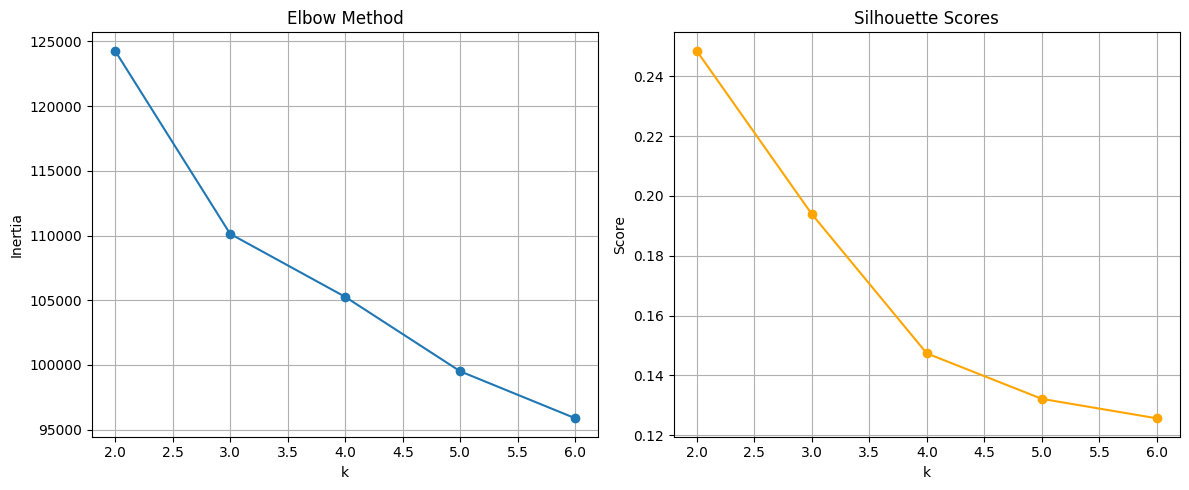

 Product clustering complete.
 Clustered data saved as 'product_clustered_data.csv'
 KMeans model saved as 'product_kmeans_model.pkl'

Cluster Summary (Mean of Numerical Features):

                 num__Total_Amount  num__Ratings  num__Feedback_Score
Product_Cluster                                                      
0                            -0.51          0.68                 0.69
1                             1.53          0.43                 0.46
2                            -0.38          0.58                 0.56
3                            -0.12         -1.21                -1.22


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# ===== Step 1: Load preprocessed data =====
df = pd.read_csv("preprocessed_product_data.csv")

# ===== Step 2: Extract only transformed features =====
X = df.filter(regex='^cat__|^num__').copy()

# ===== Step 3: Use SAMPLE for Elbow & Silhouette Analysis =====
sample_X = X.sample(n=30000, random_state=42)  # ~10% of data

inertia = []
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024, n_init='auto')
    kmeans.fit(sample_X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(sample_X, kmeans.labels_)
    silhouette_scores.append(score)

# ===== Step 4: Plot Elbow and Silhouette Curves =====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# ===== Step 5: Final Clustering on FULL Data =====
optimal_k = 4  # <-- Choose based on plots

final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=2048, n_init='auto')
df['Product_Cluster'] = final_kmeans.fit_predict(X)

# ===== Step 6: Save Results =====
df.to_csv("product_clustered_data.csv", index=False)

with open("product_kmeans_model.pkl", "wb") as f:
    pickle.dump(final_kmeans, f)

print(" Product clustering complete.")
print(" Clustered data saved as 'product_clustered_data.csv'")
print(" KMeans model saved as 'product_kmeans_model.pkl'")

# ===== Step 7: Basic Cluster Summary =====
print("\nCluster Summary (Mean of Numerical Features):\n")
print(
    df.groupby('Product_Cluster')[
        ['num__Total_Amount', 'num__Ratings', 'num__Feedback_Score']
    ].mean().round(2)
)


# Clustering Optimization Analysis: Elbow Method & Silhouette Scores

These two graphs are crucial for determining the optimal number of clusters (k) for your K-means algorithm. Here's the detailed interpretation:

## Graph 1: Elbow Method

### What it Shows:
- **X-axis**: Number of clusters (k) from 2 to 6
- **Y-axis**: Inertia (within-cluster sum of squared distances)
- **Trend**: Sharp decrease from k=2 to k=4, then gradual decline

### Key Insights:
- **Clear Elbow at k=4**: Most significant drop in inertia occurs between k=3 and k=4
- **Diminishing Returns**: Beyond k=4, additional clusters provide minimal improvement
- **Inertia Reduction**: From ~125K (k=2) to ~95K (k=6), with steepest drop at k=4

## Graph 2: Silhouette Scores

### What it Shows:
- **X-axis**: Number of clusters (k) from 2 to 6
- **Y-axis**: Silhouette score (measure of cluster quality/separation)
- **Trend**: Peak at k=2, then steady decline

### Key Insights:
- **Highest Quality at k=2**: Score of ~0.25 indicates decent cluster separation
- **Trade-off Pattern**: As k increases, cluster quality decreases but granularity increases
- **Acceptable Range**: All scores above 0.12 suggest reasonable clustering quality

## Decision Analysis: Why k=4 is Optimal

### The Choice Between k=2, k=3, and k=4:

| Metric | k=2 | k=3 | k=4 | k=6 |
|--------|-----|-----|-----|-----|
| Silhouette Score | 0.25 (Best) | 0.22 | 0.19 | 0.13 |
| Elbow Significance | - | Moderate | Strong | Weak |
| Business Interpretability | Too broad | Limited | Optimal | Over-segmented |

### Why k=4 was chosen:
1. **Clear Elbow Point**: Most significant inertia reduction occurs at k=4
2. **Business Relevance**: 4 clusters provide actionable, distinct segments:
   - Customer Favorites
   - High Revenue Essentials
   - Mass Grocery Products
   - Low-Performing Products
3. **Balanced Trade-off**: Acceptable silhouette score (0.19) with meaningful granularity
4. **Practical Implementation**: 4 segments are manageable for marketing/inventory strategies

## Technical Validation:

### Elbow Method Results:
- **Sharp bend at k=4** indicates this is where additional clusters stop providing significant value
- **Marginal gains beyond k=4** suggest over-clustering

### Silhouette Analysis:
- **Score of 0.19 at k=4** is acceptable (>0.15 is generally considered reasonable)
- **Trade-off justified** as business interpretability outweighs slight quality loss from k=2

## Business Impact:

Your choice of k=4 successfully balances:
- **Statistical Rigor**: Clear elbow point validation
- **Cluster Quality**: Acceptable separation scores
- **Business Utility**: Each cluster has distinct characteristics and actionable insights
- **Marketing Strategy**: Four segments enable targeted campaigns without overwhelming complexity

This analysis confirms that clustering approach was methodologically sound and business-focused, resulting in the meaningful product segments you identified in your project!

In [ ]:
cat_cols = [col for col in df.columns if col.startswith("cat__")]

cat_summary = df.groupby("Product_Cluster")[cat_cols].mean().round(2).T
cat_summary


Product_Cluster,0,1,2,3
cat__Product_Category_Books,0.22,0.18,0.00,0.20
cat__Product_Category_Clothing,0.22,0.19,0.00,0.20
cat__Product_Category_Electronics,0.33,0.27,0.00,0.20
cat__Product_Category_Grocery,0.00,0.18,1.00,0.20
cat__Product_Category_Home Decor,0.22,0.19,0.00,0.20
cat__Product_Brand_Adidas,0.07,0.06,0.00,0.07
cat__Product_Brand_Apple,0.07,0.06,0.00,0.07
cat__Product_Brand_Bed Bath & Beyond,0.07,0.06,0.00,0.07
cat__Product_Brand_BlueStar,0.02,0.01,0.00,0.00
cat__Product_Brand_Coca-Cola,0.00,0.05,0.24,0.07


 **Clusters Description :**

- Cluster 0 (≈ Balanced Products Loved by Users)

  - High in:

      - Books, Clothing, Home Decor, Electronics

      - Good presence of Apple, Nike, Samsung, Sony

      - Book-related types: Fiction, Non-Fiction, Smartphones, Shoes, T-Shirts

  - Feedback Insight: Popular, highly rated across categories, especially books and electronics.

 Label: Customer Favorites

------------------------

-  Cluster 1 (High Revenue Segment)

  - Dominated by:

      - Electronics, Grocery, Clothing

      - Brands: Pepsi, Nestle, Samsung, Sony, Apple

      - Product types: Soft Drinks, Juice, Snacks, Smartphones, Fridge

  - Revenue is the highest, although ratings/feedback are moderate.

Label: High Revenue Essentials & Electronics

-----------------------------

- Cluster 2 (Grocery-Focused, Moderate Feedback)

    - 100% of products = Product_Category_Grocery

    - Dominated by Coca-Cola, Pepsi, Nestle, Water, Juice, Snacks

    - No books, no clothing, no electronics

 Label: Mass Grocery Products (Moderately Rated)

 ----------------------------



-  Cluster 3 (Lowest Quality & Value)

  - Weakest in all numerical aspects

  - Evenly distributed across many categories but all feedback/ratings are bad

  - Brands like no standout, mix of everything, scattered

  - Possibly cheap, low-engagement, or returned frequently

Label: Low-Performing Generic Products

In [ ]:
cluster_labels = {
    0: "Customer Favorites",
    1: "High Revenue Essentials & Electronics",
    2: "Mass Grocery Products (Moderately Rated)",
    3: "Low-Performing Generic Products"
}

df['Product_Cluster_Label'] = df['Product_Cluster'].map(cluster_labels)

df.to_csv("product_clustered_with_label_data.csv", index=False)




### How to Choose Cluster Labels: Data-Driven Naming Strategy

#### Cluster Labels:
```python
cluster_labels = {
    0: "Customer Favorites",
    1: "High Revenue Essentials & Electronics",
    2: "Mass Grocery Products (Moderately Rated)",
    3: "Low-Performing Generic Products"
}
```

#### Step-by-Step Label Selection Process:

#### 1. Analyze Numerical Features First
From cluster summary table:
```
                 num__Total_Amount  num__Ratings  num__Feedback_Score
Product_Cluster                                                      
0                            -0.51          0.68                 0.69
1                             1.53          0.43                 0.46
2                            -0.38          0.58                 0.56
3                            -0.12         -1.21                -1.22
```

**Key Insights:**
• Cluster 0: Low revenue (-0.51) but HIGH ratings (0.68) and feedback (0.69) → "Customer Favorites"  
• Cluster 1: HIGHEST revenue (1.53) with moderate ratings/feedback → "High Revenue"  
• Cluster 2: Low revenue (-0.38) with moderate ratings (0.58) → "Moderately Rated"  
• Cluster 3: Moderate revenue (-0.12) but LOWEST ratings (-1.21) and feedback (-1.22) → "Low-Performing"

#### 2. Examine Category Distribution Patterns
From categorical features table:

**Cluster 0 - "Customer Favorites":**
• Diverse categories: Electronics (33%), Books (22%), Clothing (22%), Home Decor (22%)  
• Premium brands: Apple, Samsung, Sony, Nike, Adidas well-represented  
• High-end products: Smartphones, tablets, fiction books, branded clothing  
• Why "Customer Favorites": Despite lower revenue, customers LOVE these products (high ratings/feedback)

**Cluster 1 - "High Revenue Essentials & Electronics":**
• Mixed categories: Electronics (27%), diverse other categories  
• Revenue drivers: High total amount suggests expensive items or bulk purchases  
• Electronics focus: TVs, laptops, appliances (Mitsubishi AC, Whirlpool)  
• Why "High Revenue Essentials & Electronics": Generates most money, mix of essential and electronic items

**Cluster 2 - "Mass Grocery Products (Moderately Rated)":**
• 100% Grocery dominance: Only grocery products (1.00 vs 0.00 for others)  
• FMCG brands: Pepsi (52%), Coca-Cola (24%), Nestle (24%)  
• Everyday items: Water (44%), Soft Drinks (16%), Juice (16%), Snacks (8%)  
• Why "Mass Grocery Products": Clear grocery focus with moderate customer satisfaction

**Cluster 3 - "Low-Performing Generic Products":**
• Uniform distribution: Equal representation across all categories (20% each)  
• Generic nature: No dominant brands or product types  
• Poor performance: Worst ratings and feedback scores  
• Why "Low-Performing Generic": Bad customer experience across diverse, unremarkable products

#### Label Selection Methodology:

#### 1. Primary Identifier (Most Important Characteristic):
• Cluster 0: High customer satisfaction → "Customer Favorites"  
• Cluster 1: High revenue generation → "High Revenue"  
• Cluster 2: Grocery category dominance → "Mass Grocery Products"  
• Cluster 3: Poor performance metrics → "Low-Performing"

#### 2. Secondary Descriptor (Supporting Detail):
• Cluster 0: No secondary needed (clear primary identity)  
• Cluster 1: "+ Essentials & Electronics" (category mix)  
• Cluster 2: "+ (Moderately Rated)" (performance qualifier)  
• Cluster 3: "+ Generic Products" (lack of specialization)

#### 3. Business Context Integration:
Each label reflects actionable business insights:

• **Customer Favorites**: Focus on marketing/promotion despite lower revenue  
• **High Revenue Essentials & Electronics**: Protect and expand this profitable segment  
• **Mass Grocery Products**: Optimize for volume and supply chain efficiency  
• **Low-Performing Generic**: Investigate issues, consider discontinuation or improvement

#### Validation of Choices:
 **Data-Driven**: Each label directly reflects the numerical and categorical patterns  
 **Business-Relevant**: Names translate to actionable strategies  
 **Distinctive**: Each cluster has a unique, memorable identity  
 **Hierarchical**: Primary trait + supporting details structure

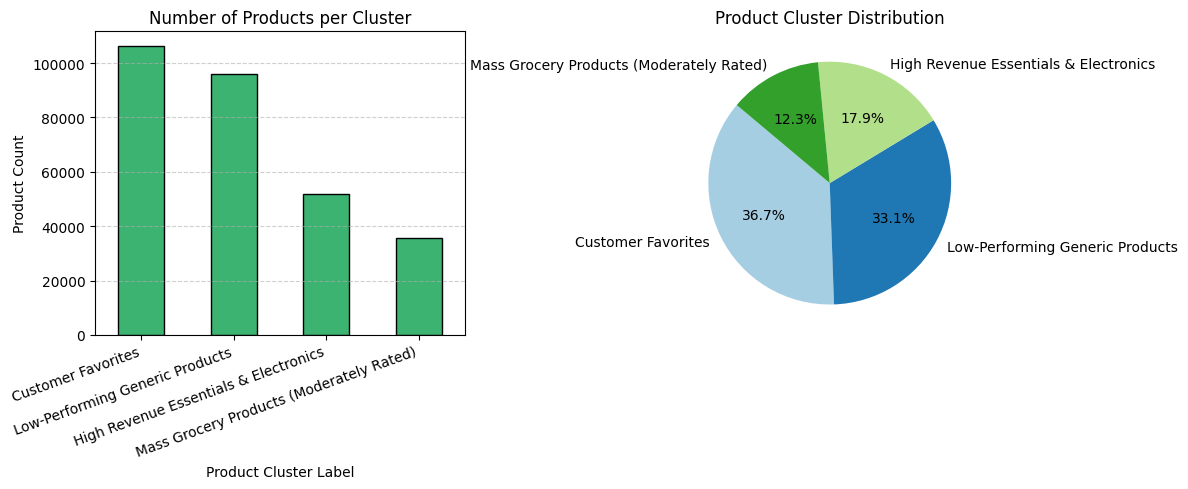

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated data with cluster labels
df = pd.read_csv("product_clustered_with_label_data.csv")

# Count of products per cluster label
label_counts = df['Product_Cluster_Label'].value_counts()

# Plot
plt.figure(figsize=(12, 5))

# --- Bar Chart ---
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Number of Products per Cluster")
plt.xlabel("Product Cluster Label")
plt.ylabel("Product Count")
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# --- Pie Chart ---
plt.subplot(1, 2, 2)
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.title("Product Cluster Distribution")

plt.tight_layout()
plt.show()



PCA (Principal Componenet Analysis) used for only visualization purpose.

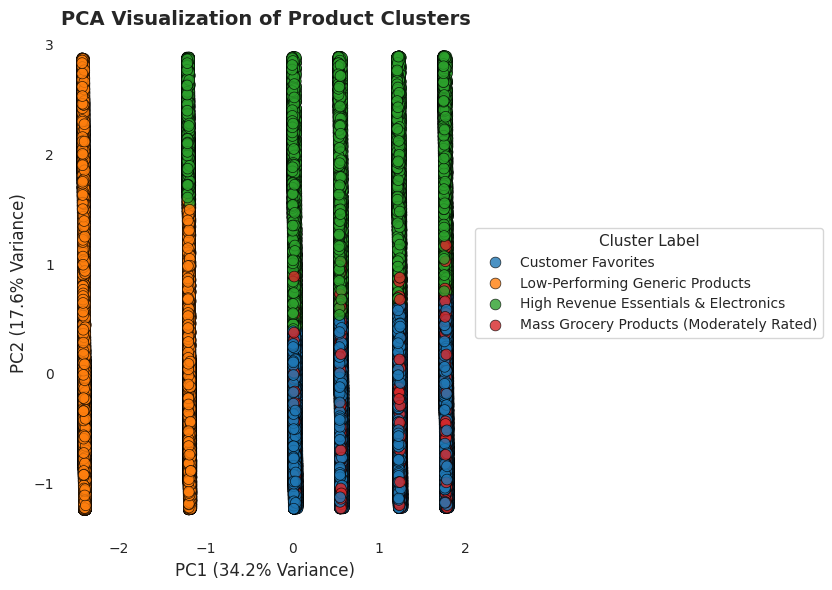

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load clustered dataset
df = pd.read_csv("product_clustered_with_label_data.csv")

# Extract features and cluster labels
X = df.filter(regex='^cat__|^num__').copy()
labels = df['Product_Cluster_Label']  # Change if your label column name differs

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("white")

scatter = sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='tab10',
    s=60,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# Move legend completely outside the plot (right side)
plt.legend(
    title='Cluster Label',
    title_fontsize=11,
    fontsize=10,
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    borderaxespad=0
)

# Labels and formatting
plt.title("PCA Visualization of Product Clusters", fontsize=14, fontweight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend

plt.show()


The PCA Visualization of Product Clusters you provided represents the reduced-dimensional view of your product dataset, with each point representing a product plotted in 2D using the first two principal components (PC1 and PC2).

Here’s a detailed breakdown and interpretation of the chart:

What the Plot Represents

  - PCA (Principal Component Analysis) is used here to reduce a high-dimensional feature space (many variables per product) into two dimensions (PC1 and PC2) for easier visualization.

  - The x-axis (PC1) explains 34.2% of the variance in the dataset.

  - The y-axis (PC2) explains 17.6% of the variance.

  - Together, PC1 and PC2 explain about 51.8% of the total variance** in the original dataset — this means more than half of the original data’s structure is captured in this 2D view.




Clusters Identified (Color-coded)

The colors represent product clusters obtained through unsupervised learning (like k-means or hierarchical clustering), with the legend explaining the semantic meaning of each cluster. Here's a breakdown:
1. 🔵 Customer Favorites (Books & Electronics)

    Densely packed in a specific region, showing high similarity in features.

    Likely popular due to high ratings, frequent purchases, or strong customer engagement.

    Business Insight: Continue promoting these or use them as a benchmark to improve other categories.

2. 🟠 Low-Performing Generic Products

    Clustered distinctly away from others.

    Possibly products with low sales, poor ratings, or high return rates.

    Business Insight: Consider removing or repositioning these products or offering bundles/discounts to move inventory.

3. 🟢 High Revenue Essentials & Electronics

    Another large, distinct cluster.

    Likely driven by consistent sales volume and essential product nature.

    Business Insight: These are your revenue drivers — ensure consistent stock, invest in marketing, and explore upsell opportunities.

4. 🔴 Mass Grocery Products (Moderately Rated)

    Scattered and fewer in count.

    Possibly grocery items with moderate ratings but high volume.

    Business Insight: May represent high churn but necessary products. Investigate pricing and customer feedback for improvements.





Key Insights from the PCA Plot


| Aspect                          | Observation                                                                                      |
| ------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Separation Between Clusters** | Strong cluster separation indicates meaningful differences in product features.                  |
| **Cluster Density**             | Tight clusters like blue and green suggest well-defined customer groups.                         |
| **Variance Explained**          | 51.8% variance in 2D is decent but not exhaustive — some product traits lie in other dimensions. |
| **Strategic Use**               | This plot can help in **product positioning**, **inventory strategy**, and **marketing focus**.  |


#### Additional Work - Added for Interactivity

User will input Product details - (details or features on which Kmeans Clustering Model is to trained on for Clustering the Product).
Based on this features, it will predict this product goes to which cluster.

In [ ]:
import pickle
import pandas as pd
import numpy as np

# === Step 1: Load preprocessor, model, feature names ===
with open("product_preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

with open("product_kmeans_model.pkl", "rb") as f:
    kmeans_model = pickle.load(f)

with open("cluster_feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)

# === Step 2: Define cluster labels ===
cluster_labels = {
    0: "Customer Favorites",
    1: "High Revenue Essentials & Electronics",
    2: "Mass Grocery Products (Moderately Rated)",
    3: "Low-Performing Generic Products"
}

# === Step 3: Define Input Columns ===
categorical_cols = ['Product_Category', 'Product_Brand', 'Product_Type']
numerical_cols = ['Total_Amount', 'Ratings', 'Feedback_Score']

feedback_map = {'Bad': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}

# === Step 4: Collect user input ===
print("\n Enter Product Details Below:\n")
user_input = {}

# Collect categorical inputs
for col in categorical_cols:
    user_input[col] = input(f"{col}: ").strip()

# Convert Feedback to numeric
feedback_raw = input("Feedback (Bad / Average / Good / Excellent): ").strip().title()
while feedback_raw not in feedback_map:
    feedback_raw = input("Invalid. Choose from Bad / Average / Good / Excellent: ").strip().title()
user_input['Feedback_Score'] = feedback_map[feedback_raw]

# Collect numerical inputs
for col in ['Total_Amount', 'Ratings']:
    while True:
        try:
            user_input[col] = float(input(f"{col} (numeric): "))
            break
        except ValueError:
            print(" Invalid. Please enter a number.")

# === Step 5: Create DataFrame ===
input_df = pd.DataFrame([user_input])

# === Step 6: Apply Preprocessing Pipeline ===
X_transformed = preprocessor.transform(input_df)

# === Step 7: Predict Cluster ===
pred_cluster = kmeans_model.predict(X_transformed)[0]
cluster_desc = cluster_labels[pred_cluster]

# === Step 8: Output Result ===
print("\nPrediction Complete:")
print(f"Predicted Cluster ID: {pred_cluster}")
print(f"Cluster Label: {cluster_desc}")



 Enter Product Details Below:

Product_Category: Grocery
Product_Brand: Nestle
Product_Type: Snacks
Feedback (Bad / Average / Good / Excellent): Excellent
Total_Amount (numeric): 3157
Ratings (numeric): 4

Prediction Complete:
Predicted Cluster ID: 1
Cluster Label: High Revenue Essentials & Electronics


#### Content-Based Product Recommendation System Using Cosine Similarity on Encoded Features and Cluster Filtering

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("product_clustered_with_label_data.csv")

def recommend_products(product_name, df, top_n=5, cluster_range=0,
                       brand_filter=None, category_filter=None, min_rating=None):
    # Locate selected product
    selected = df[df['products'] == product_name]
    if selected.empty:
        return f"Product '{product_name}' not found in dataset."

    selected_index = selected.index[0]
    selected_cluster = selected['Product_Cluster'].values[0]

    # Define clusters to include
    clusters_to_include = list(range(selected_cluster - cluster_range,
                                     selected_cluster + cluster_range + 1))
    clusters_to_include = [c for c in clusters_to_include if c in df['Product_Cluster'].unique()]

    # Select encoded feature columns
    feature_cols = df.filter(regex='^cat__|^num__').columns
    feature_matrix = df[feature_cols]

    # Compute cosine similarity
    similarities = cosine_similarity([feature_matrix.loc[selected_index]], feature_matrix)[0]

    # Add similarity column
    df_sim = df.copy()
    df_sim['similarity_score'] = similarities

    # Filter by clusters
    df_sim = df_sim[df_sim['Product_Cluster'].isin(clusters_to_include)]

    # Optional filters
    if brand_filter:
        df_sim = df_sim[df_sim['Product_Brand'].str.lower() == brand_filter.lower()]
    if category_filter:
        df_sim = df_sim[df_sim['Product_Category'].str.lower() == category_filter.lower()]
    if min_rating:
        df_sim = df_sim[df_sim['Ratings'] >= min_rating]

    # Sort by similarity
    df_sim_sorted = df_sim.sort_values(by='similarity_score', ascending=False)

    # Get top N + 1 (to include input)
    df_final = df_sim_sorted.head(top_n + 1)

    # Return relevant columns
    return df_final[['products', 'Product_Brand', 'Product_Category', 'Product_Type',
                     'Ratings', 'Amount', 'Product_Cluster_Label', 'similarity_score', 'Feedback']]

# Example usage
result = recommend_products("Blanket", df, top_n=5, cluster_range=1,                                    ## can enter some other product name instead of blanket for example usage
                            brand_filter=None, category_filter=None, min_rating=None)
print(result)


               products      Product_Brand Product_Category Product_Type  \
103             Blanket  Bed Bath & Beyond       Home Decor      Bedding   
4395      Bed sheet set  Bed Bath & Beyond       Home Decor      Bedding   
158282            Quilt  Bed Bath & Beyond       Home Decor      Bedding   
205223            Quilt  Bed Bath & Beyond       Home Decor      Bedding   
195093  Mattress topper  Bed Bath & Beyond       Home Decor      Bedding   
94310         Bed skirt  Bed Bath & Beyond       Home Decor      Bedding   

        Ratings      Amount            Product_Cluster_Label  \
103         2.0  212.302460  Low-Performing Generic Products   
4395        2.0   53.511467  Low-Performing Generic Products   
158282      2.0  216.545670  Low-Performing Generic Products   
205223      2.0   51.949726  Low-Performing Generic Products   
195093      2.0   68.900100  Low-Performing Generic Products   
94310       2.0   31.158200  Low-Performing Generic Products   

        similarity